In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# დატაფრეიმის გამოკვლევა

In [208]:
df=pd.read_parquet("mid.parquet")
df

,Artist,Spotify_URL,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Youtube_URL,Youtube_Title,Youtube_Channel,Youtube_Views,Youtube_Likes,Youtube_number_of_Comments,Youtube_Description,Is_Licensed_on_Youtube,Is_official_video,Spotify_stream_num
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,Album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.70500,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.0,1.0,1.040235e+09
1,Beach House,https://open.spotify.com/artist/56ZTgzPBDge0Ov...,Silver Soul,Teen Dream,Album,spotify:track:2LZ2CNbcbJrwh53pitRgom,0.356,0.67000,2.0,-5.825,...,https://www.youtube.com/watch?v=njbmwfndFH4,Beach House - Silver Soul [OFFICIAL VIDEO],Sub Pop,1837847.0,30695.0,1466.0,Subscribe To Sub Pop's YouTube Channel http://...,1.0,1.0,8.343322e+07
2,Al Green,https://open.spotify.com/artist/3dkbV4qihUeMsq...,I'm Still in Love with You,I'm Still in Love with You,Album,spotify:track:2GEDd9qtGXU7IvGgqTF6Uj,0.712,0.39300,0.0,-9.538,...,https://www.youtube.com/watch?v=Tg_Guhd6fEY,Al Green - I'm Still in Love with You (Officia...,Al Green,1604715.0,21048.0,366.0,"Official audio for ""I'm Still in Love with You...",1.0,1.0,2.748388e+07
3,Al Green,https://open.spotify.com/artist/3dkbV4qihUeMsq...,Love and Happiness,I'm Still in Love with You,Album,spotify:track:6SMHgPgNkhe9lneNTbgtel,0.823,0.45700,6.0,-10.961,...,https://www.youtube.com/watch?v=uPh-31TtEOI,AL Green - Love and Happiness (RE-MASTERED) HD...,VDJ MikeyMike,363208.0,3821.0,145.0,Had to be done. Couldn't find anything out th...,0.0,0.0,8.005354e+07
4,Beach House,https://open.spotify.com/artist/56ZTgzPBDge0Ov...,Myth,Bloom,Album,spotify:track:2NfxtzCIrpCmJX5Z2KMdD5,0.445,0.70800,3.0,-6.268,...,https://www.youtube.com/watch?v=cfBmizHxJec,Beach House - Myth,Cosmic Radiation,2439327.0,76693.0,905.0,"The exact video that was present on ""I'm cybor...",0.0,0.0,1.141535e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,Michael Giacchino,https://open.spotify.com/artist/4kLvhMAuCloLxo...,Stuff We Did,Up (Original Motion Picture Soundtrack),single,spotify:track:19blFYzqmPj7FtW7W4DFEl,0.256,0.00484,7.0,-34.386,...,https://www.youtube.com/watch?v=16N4OjhjZAE,Stuff We Did,Michael Giacchino - Topic,4275822.0,91547.0,2155.0,Provided to YouTube by Universal Music Group\n...,1.0,1.0,3.922862e+07
20714,ATB,https://open.spotify.com/artist/7jZM5w05mGhw6w...,Your Love (9PM),Your Love (9PM),single,spotify:track:5YaskwnGDZFDRipaqzbwQx,0.669,0.78400,7.0,-5.603,...,https://www.youtube.com/watch?v=9hbu9toStfc,"ATB, Topic, A7S - Your Love (9PM) (Official Mu...",ATBVEVO,27148915.0,306702.0,4255.0,"ATB, Topic, A7S - 'Your Love (9PM)' out now!\n...",1.0,1.0,5.613685e+08
20715,Blueface,https://open.spotify.com/artist/3Fl1V19tmjt57o...,TikTok,TikTok,single,spotify:track:5fMAZiE6Kdqo3fWIOXMtH6,0.752,0.56100,3.0,-8.754,...,https://www.youtube.com/watch?v=whsLEiYlcOI,Blueface - TikTok (Official Music Video),BluefaceVEVO,6048777.0,188325.0,4508.0,Blueface “TikTok” OUT NOW!\nhttps://lnk.to/BFT...,1.0,1.0,1.411268e+07
20716,Tribo da Periferia,https://open.spotify.com/artist/1xxS2WrLlgl9QN...,Algo Íntimo,Algo Íntimo,single,spotify:track:7e0DPzHixf5MyclQRCUkJa,0.662,0.51700,3.0,-9.079,...,https://www.youtube.com/watch?v=0jO4y5s3H_g,Tribo da Periferia - Algo Íntimo (Official Mus...,Tribo da Periferia,7842647.0,174912.0,5175.0,Ouça em todas as plataformas digitas: https://...,1.0,1.0,3.334337e+06


თავიდან უბრალოდ გამოვიკვლიე სვეტები და გავერკვიე რა ინფორმაციის მიღება შეიძლებოდა თითოულიდგან. ისეთი სვეტები რომლებიც URL-ებს შეიცავდნენ არაფერში გამოგვადგებოდა ამიტომ თავიდანვე ამოვაკელი, როგორც ქვემოთ ჩანს

In [209]:
print(df.columns)
df=df[['Artist', 'Track', 'Album', 'Album_type',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Youtube_Title', 'Youtube_Channel',
       'Youtube_Views', 'Youtube_Likes', 'Youtube_number_of_Comments',
       'Is_Licensed_on_Youtube', 'Is_official_video',
       'Spotify_stream_num']]

Index(['Artist', 'Spotify_URL', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Youtube_URL', 'Youtube_Title', 'Youtube_Channel',
       'Youtube_Views', 'Youtube_Likes', 'Youtube_number_of_Comments',
       'Youtube_Description', 'Is_Licensed_on_Youtube', 'Is_official_video',
       'Spotify_stream_num'],
      dtype='object')


ასევე გამოვიკვლიე თითოეული სვეტის თაიფები.Youtube_Likesში და Danceabilityში წესით სულ ფლოუთები უნდა ეწეროს მაგრამ რადგან თაიფი ობჯექტია ალბათ სთრინგებიც აქვს შეყოლილი და ამ სვეტებს მიხედვა სჭირდება, ასევე ვხედავთ რომ დუპლიკატები არ არის

In [210]:
df.dtypes

Artist                         object
Track                          object
Album                          object
Album_type                     object
Danceability                   object
Energy                        float64
Key                           float64
Loudness                      float64
Speechiness                   float64
Acousticness                  float64
Instrumentalness              float64
Liveness                      float64
Valence                       float64
Tempo                         float64
Duration_ms                   float64
Youtube_Title                  object
Youtube_Channel                object
Youtube_Views                 float64
Youtube_Likes                  object
Youtube_number_of_Comments    float64
Is_Licensed_on_Youtube        float64
Is_official_video             float64
Spotify_stream_num            float64
dtype: object

In [211]:
print(df.duplicated().sum())

0


ქვემოთ გამოვიკვლიე სულ რამდენი NaN გვაქვს თითოეულ სვეტში. ჯერჯერობით ხელს არ ვახლებ

In [212]:
df.isna().sum()

Artist                          0
Track                           0
Album                           0
Album_type                      0
Danceability                    0
Energy                          2
Key                             2
Loudness                        2
Speechiness                     2
Acousticness                    2
Instrumentalness                2
Liveness                        2
Valence                         2
Tempo                           2
Duration_ms                     2
Youtube_Title                   0
Youtube_Channel               470
Youtube_Views                 470
Youtube_Likes                   0
Youtube_number_of_Comments    569
Is_Licensed_on_Youtube        470
Is_official_video             470
Spotify_stream_num            576
dtype: int64

ახლა ვცადე ლაიქების სვეტის გამოსწორება. თავიდან მეგონა რომ პრობლემა მხოლოდ სთრინგად ჩაწერილ "nan" ში იყო, მაგრამ რადგან მათი წაშლის შემდეგ თაიფი ისევ ობჯექტი რჩებოდა, რენდომ ვალუების გამოძახებით მივხვდი რომ სხვა სტრინგებიც ეწერა. ეს სტრინგები უბრალოდ None valueებით ჩავანაცვლე

In [213]:
# df['Youtube_Likes'].value_counts()
# random_values = df['Youtube_Likes'].sample(n=100)
def string_cleaner(x): # დროებით ნანებით ჩავანაცვლოდ რაც ფლოუტში არ გადავა
    try:
        return float(x)
    except:
        return None 
df.loc[:,'Youtube_Likes'] = df.loc[:,'Youtube_Likes'].apply(string_cleaner) #ეს ვარნინგი რასაც მეუბნება ისე დავწერე მაგრამ მაინც არ ქრება


C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\154160538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Youtube_Likes'] = df.loc[:,'Youtube_Likes'].apply(string_cleaner) #ეს ვარნინგი რასაც მეუბნება ისე დავწერე მაგრამ მაინც არ ქრება
C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\154160538.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Youtube_Likes'] = df.loc[:,'Youtube_Likes'].apply(string_cleaner) #ეს ვარნინგი რასაც მეუბნება ისე დავწერე მაგრამ მაინც არ ქრება


ახლა Danceabilityს მოვდე იგივე ფუნქცია და ისიც გასუფთავდა

In [214]:
df["Danceability"]=df["Danceability"].apply(string_cleaner)
df["Danceability"].mean()

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\154364611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Danceability"]=df["Danceability"].apply(string_cleaner)


0.6197277938761712

In [215]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Youtube_Views,Youtube_Likes,Youtube_number_of_Comments,Is_Licensed_on_Youtube,Is_official_video,Spotify_stream_num
count,20706.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,20248.00,2.016700e+04,2.014900e+04,20248.000000,20248.000000,2.014200e+04
mean,0.619728,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,inf,6.636081e+05,2.751899e+04,0.698341,0.776521,1.359422e+08
std,0.165283,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,NaN,1.789727e+06,1.932347e+05,0.458990,0.416587,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.00,0.000000e+00,0.000000e+00,0.000000,0.000000,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1826338.00,2.155600e+04,5.090000e+02,0.000000,1.000000,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,14511677.00,1.244860e+05,3.277000e+03,1.000000,1.000000,4.968298e+07
75%,0.740000,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,70534398.75,5.222685e+05,1.436000e+04,1.000000,1.000000,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,inf,5.078865e+07,1.608314e+07,1.000000,1.000000,3.386520e+09


df.describe()ში ასევე გამოჩნდა რომ იუთუბის view ებში ზოგან inf წერია რაც უაზრობაა, ამიტომ ნანებით ჩავანაცვლებ

In [216]:
df['Youtube_Views'] =df['Youtube_Views'].apply(lambda x: None if np.isinf(x) else x)

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\4190530270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Youtube_Views'] =df['Youtube_Views'].apply(lambda x: None if np.isinf(x) else x)


შემდეგ მაინტერესებდა შემეხედა ვიუებით ტოპ სიმღერებისთვის და აღმოვაჩინე რომ დესპასიტო ორჯერ განმეორდა და თანაც მხოლოდ არტისტით, ათეულობით ლაიქით და კომენტარით გასხვავდებიან. აქედან ერთი მთავარი არტისტია, მეორე featuring, ასე რომ ამ ორივე როუს შენახვას არანაირი აზრი არ აქვს

In [217]:
df = df.sort_values('Youtube_Views', ascending=False)
df.head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Youtube_Title,Youtube_Channel,Youtube_Views,Youtube_Likes,Youtube_number_of_Comments,Is_Licensed_on_Youtube,Is_official_video,Spotify_stream_num
4989,Luis Fonsi,Despacito,VIDA,Album,0.655,0.797,2.0,-4.787,0.1530,0.198,...,177.928,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,1.0,1.0,1.506598e+09
7306,Daddy Yankee,Despacito,VIDA,Album,0.655,0.797,2.0,-4.787,0.1530,0.198,...,177.928,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,1.0,1.0,1.506598e+09
242,Ed Sheeran,Shape of You,÷ (Deluxe),Album,0.825,0.652,1.0,-3.183,0.0802,0.581,...,95.977,233713.0,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,1.0,1.0,3.362005e+09
19207,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.369,...,80.025,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,1.0,1.0,1.521255e+09
7908,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Single,0.689,0.481,10.0,-7.503,0.0815,0.369,...,80.025,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773797e+09,40147618.0,2127345.0,1.0,1.0,1.521255e+09


In [218]:
# შეიძლება ორ სიმღერას ერთი და იგივე სახელი ერქვას, ამიტომ სხვა სვეტებითაც შევადარე რომ დავრწმუნდეთ რომ მართლა დუპლიკატს ვაქრობთ
df["Album_type"]=df["Album_type"].apply(lambda x: x.capitalize()) # ეს მოგვიანებით შევამჩნიე 
# პრობლემას ქმნიდა ალბუმ თაიფის სვეტი სადაც ზოგი დიდი ასოთი იყო შეყვანილი, ზოგი პატარათი და დუპლიკატებს ტოვებდა
df.drop_duplicates(subset=['Track', 'Album','Album_type','Danceability'],keep="first" ,inplace=True) 



ასევე შევამჩნიე რომ ზოგიერთი სიმღერა საერთოდ არაა ატვირთული იუთუბზე და სათაურად "nan" უწერია. "nan" შევცვალე "Not uploaded"-ით, და ასევე აღსანიშნავია, რომ ამ სიმღერებს ვიუებში,ლაიქებში და კომენტარებშიც ნან უწერიათ და არც იქ აქვს აზრი რაიმის ჩაწერას

In [219]:
df["Youtube_Title"]=df["Youtube_Title"].apply(lambda x: "Not uploaded" if x=="nan" else x)

შემდეგ დავაკვირდი "Is_Licensed_on_Youtube" და "Is_official_video" სვეტებს და გამოჩნდა რომ ექვივალენტურებია და ზუსტად ერთი და იგივე როუებში ეწერათ ნანები. ამიტომ ერთერთი გადავაგდოთ

In [220]:
df=df.drop("Is_Licensed_on_Youtube",axis=1)

შემდეგ გადავყარე როეუბი სადაც 2-2 ენთრი აკლდა მუსიკის აღწერილობებს, შევამოწმე და ყველას ერთი და იგივე როუებში აკლდათ და ასევე დიდად ცნობილი სიმღერებიც არ იყო აღდგენა რომ ღირდეს

In [221]:
columns=["Energy","Key","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Duration_ms"]
df = df.dropna(subset=columns)

# Outliers გამოკვლევა და  Nan ვალუების შევსება

რადგან ყველაზე მნიშვნელოვანი სვეტები იუთუბის ვიუები და სპოტიფაის სტრიმები იყო ორივე საფუძვლიანად გამოვიკვლიე. ვიუებში არც ის
ყველაზე ნაკლებნახვიანი სიმღერები იყო მოსაჭრელი, რადგან ასეთ სიმღერებს სპოტიფაიზე საკმაოდ ბევრი გასტრიმვა ქონდათ და ვალიდურ დეითას გავდა, და არც მილიარდზე მეტ ნახვიანი სიმღერები იყო გადასაგდები, რადგან ისინიც ვალიდური სიმღერები იყო. იგივე შეიძლება ითქვას სპოტიფაის სტრიმებზეც, თუმცა იქ ყველაზე ნაკლებ სტრიმიან სიმღერას 7052367 გასტიმვა ჰქონდა.

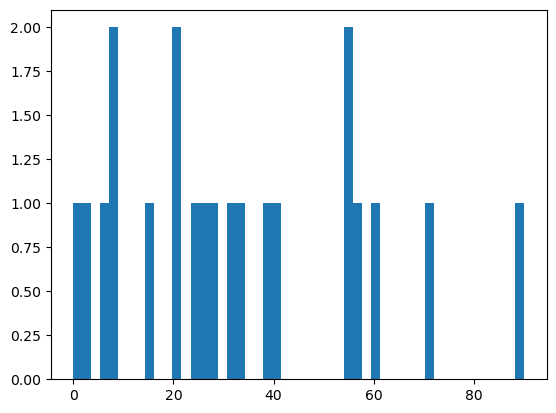

In [222]:
#იუთუბის ცოტა ნახვიანი სიმღერები
data=df[df["Youtube_Views"]<100]["Youtube_Views"]
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(data, bins=50)
plt.show()
# df[df["Youtube_Views"] ვალიდ დეითას გავს იმიტომ რომ სპოტიფაიზე უმეტესობას ბევრი ვიუ აქვს და არ წავშლი

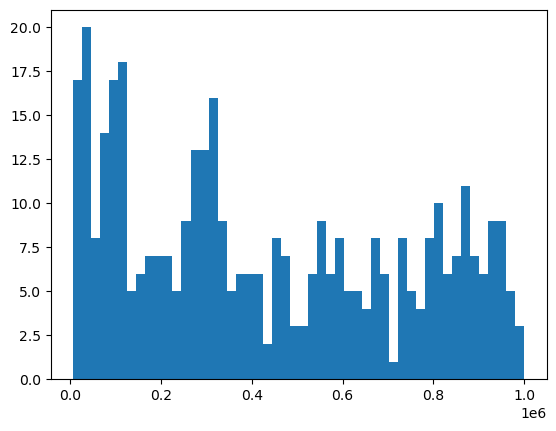

20193    18122021.0
20682    18637794.0
20691     7052367.0
Name: Spotify_stream_num, dtype: float64

In [223]:
# #სპოტიფაის სტრიმები
data=df[df["Spotify_stream_num"]<1000000]["Spotify_stream_num"]
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(data, bins=50)
plt.show()
df["Spotify_stream_num"].tail(3)


#spotifaize ar aris titqmis cota mosmeniani simgerebi

In [224]:
smalles_indices=df["Youtube_Likes"].nsmallest(10).index
df.loc[smalles_indices]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Youtube_Title,Youtube_Channel,Youtube_Views,Youtube_Likes,Youtube_number_of_Comments,Is_official_video,Spotify_stream_num
1546,Peter Groeger,Kapitel 1.1 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,Album,0.4890,0.3940,4.0,-16.778,0.8700,0.7220,...,0.2080,83.480,188400.0,Kapitel 1.1,Jean Bolinder - Topic,119.0,0.0,0.0,1.0,NaN
1584,Peter Groeger,Kapitel 1.2 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,Album,0.6570,0.2710,1.0,-21.100,0.5940,0.5310,...,0.8030,89.514,193900.0,Kaiser von China,Captain Risiko - Topic,55.0,0.0,0.0,1.0,NaN
1547,Peter Groeger,Kapitel 5.2 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,Album,0.6680,0.3950,8.0,-21.659,0.9360,0.6090,...,0.4080,121.169,200100.0,Kaiser von China,Captain Risiko - Topic,55.0,0.0,0.0,1.0,NaN
10107,White Noise for Babies,Womb Sound - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Album,0.0731,0.2730,1.0,-36.766,0.0955,0.7720,...,0.0357,177.756,56223.0,Womb Sound 1 - Loopable White Noise With No Fade,Soothing White Noise for Infant Sleeping and M...,41.0,0.0,0.0,1.0,2.190744e+07
1623,Peter Groeger,Kapitel 1.4 & Kapitel 2.1 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,Album,0.5160,0.2790,5.0,-22.129,0.9050,0.5940,...,0.6940,174.453,188053.0,Kapitel 1.4,Various Artists - Topic,38.0,0.0,0.0,1.0,NaN
3061,Christian Rode,Kapitel 1.4 & Kapitel 2.1 - Sindbad der Seefahrer,Sindbad der Seefahrer,Album,0.7160,0.2980,5.0,-18.867,0.9410,0.3120,...,0.5000,66.315,187266.0,Kapitel 1.4,Various Artists - Topic,34.0,0.0,0.0,1.0,NaN
8547,Christian Rode,Auf dem hohen Küstensande (Von Meer und Strand...,Auf dem hohen Küstensande (Von Meer und Strand...,Single,0.4940,0.0214,9.0,-22.271,0.0476,0.9350,...,0.1120,112.703,167415.0,Auf dem hohen Küstensande (Von Meer und Strand...,Christian Rode - Topic,28.0,0.0,0.0,1.0,NaN
13844,Maroon 5,"Moves Like Jagger - Studio Recording From ""The...",Hands All Over,Album,0.7220,0.7580,11.0,-4.477,0.0471,0.0111,...,0.6200,128.047,201160.0,Moves Like Jagger - Studio Recording From The ...,water Chillon,26.0,0.0,0.0,0.0,1.004576e+09
15073,Christian Rode,Kapitel 3.4 & Kapitel 4.1 - Sindbad der Seefahrer,Sindbad der Seefahrer,Album,0.6600,0.3200,5.0,-18.251,0.8950,0.2540,...,0.3520,92.865,192223.0,Kapitel 3.4,Various Artists - Topic,24.0,0.0,0.0,1.0,NaN
1622,Peter Groeger,Kapitel 2.5 & Kapitel 3.1 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,Album,0.5130,0.1910,4.0,-21.935,0.9140,0.6080,...,0.5370,65.513,247207.0,Kapitel 2.5,Various Artists - Topic,21.0,0.0,0.0,1.0,NaN


ახლა ზოგადად შევხედოთ სხვა სვეტების ჰისტოგრამებსაც. ერთი შეხედვით ცუდ დეითას არ გავს და დაწვრილებით აღარ გამოვიკვლევ დანარჩენ სვეტებს

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Loudness'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Valence'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Youtube_Views'}>],
       [<Axes: title={'center': 'Youtube_Likes'}>,
        <Axes: title={'center': 'Youtube_number_of_Comments'}>,
        <Axes: title={'center': 'Is_official_video'}>,
        <Axes: title={'center': 'Spotify_stream_num'}>]], dtype=object)

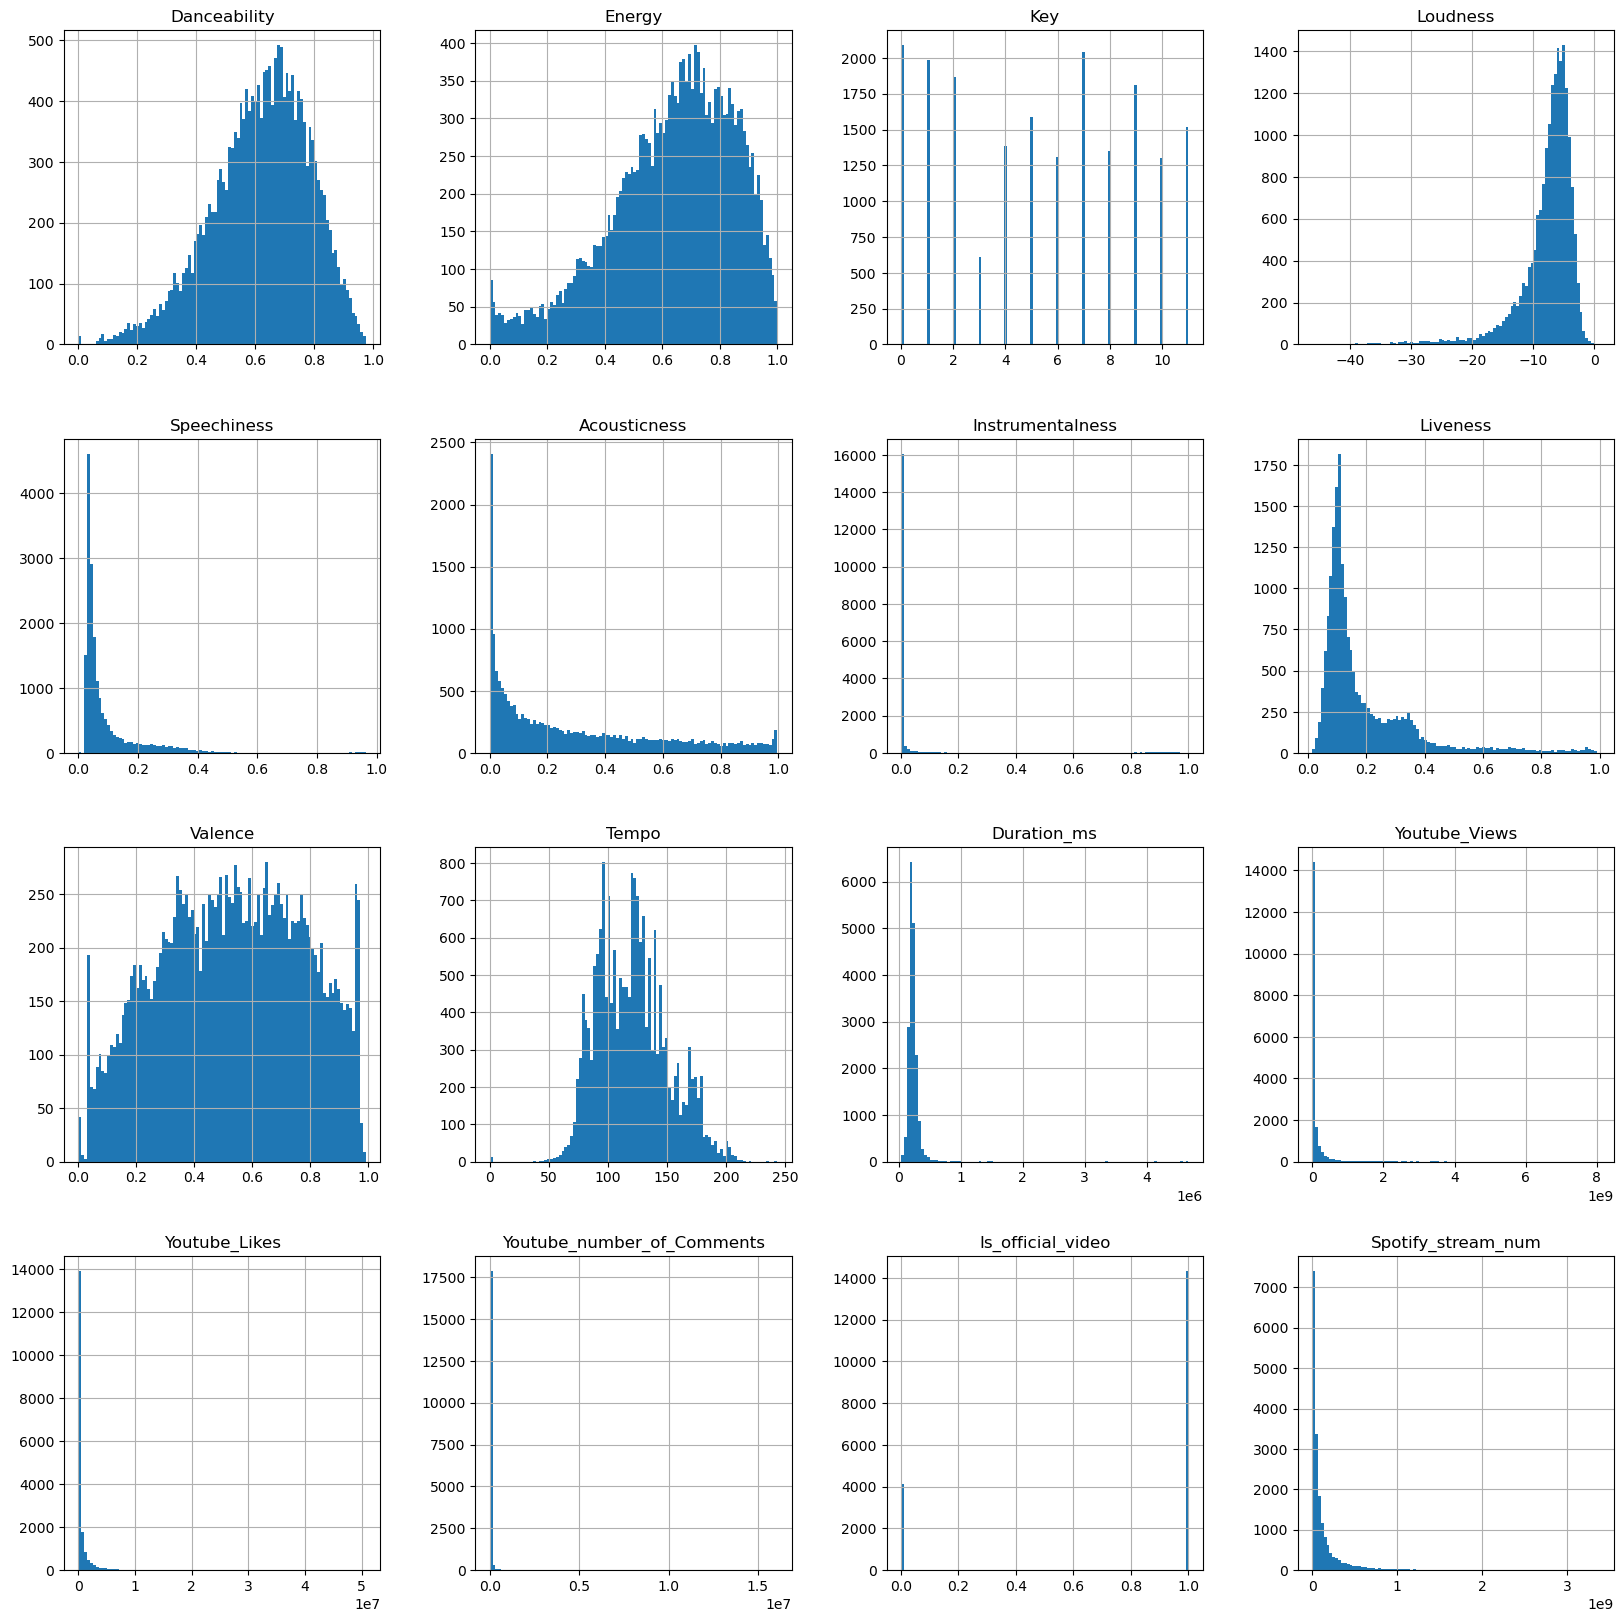

In [225]:
df.hist(bins=100,figsize=(20,20))


In [226]:
largest_indices=df["Instrumentalness"].nlargest(10).index
df.loc[largest_indices]
#ამ სვეტის ინტერპეტირება როგორც ჩანს ისე შეიძლება რომ რაც უფრო მაღალი კოეფიციენტი აქვს უფრო ჩუმი და ნაკლებლაპარაკიანი კონტენტია
# სიმღერები ნაკლებადაა, white noise, asmr და ეგეთი რაღაცეებია

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Youtube_Title,Youtube_Channel,Youtube_Views,Youtube_Likes,Youtube_number_of_Comments,Is_official_video,Spotify_stream_num
1838,White Noise for Babies,"Soothing White Noise - Loopable, No Fade",White Noise,Album,0.0000,0.001250,1.0,-27.592,0.0000,0.9080,...,0.00000,0.000,72223.0,"White Noise Black Screen | Sleep, Study, Focus...",Relaxing White Noise,157884163.0,483072.0,30861.0,1.0,71571206.0
10097,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Album,0.0000,0.001250,1.0,-27.592,0.0000,0.9080,...,0.00000,0.000,72223.0,"Brown Noise, Black Screen 🟤⬛ • 12 hours • No ads",DJ Grossman,2329675.0,11249.0,597.0,1.0,128701242.0
18903,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,Single,0.0000,0.003420,8.0,-28.460,0.0000,0.7910,...,0.00000,0.000,90228.0,Clean White Noise - Loopable With No Fade,White Noise - Topic,1492.0,18.0,0.0,1.0,26018007.0
10096,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Album,0.0000,0.003420,8.0,-28.460,0.0000,0.7910,...,0.00000,0.000,90228.0,Clean White Noise - Loopable With No Fade,White Noise - Topic,1492.0,18.0,0.0,1.0,956435715.0
5875,White Noise Baby Sleep,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Album,0.0000,0.000055,10.0,-21.995,0.0000,0.9210,...,0.00000,0.000,108527.0,Air Conditioner - Loopable With No Fade,White Noise - Topic,407.0,1.0,0.0,1.0,26677287.0
5872,White Noise Baby Sleep,White Noise Relaxation for Calming Down Fussy ...,White Noise for Sleeping Babies,Album,0.0000,0.373000,10.0,-16.469,0.0000,0.1530,...,0.00000,0.000,593754.0,White Noise Relaxation for Calming Down Fussy ...,White Noise - Topic,376087.0,561.0,0.0,1.0,15110333.0
2877,Ocean Sounds,White Noise Waves,Baby Sleep: Ocean Sounds,Album,0.0738,0.352000,3.0,-15.778,0.0619,0.0673,...,0.01850,173.517,108500.0,Ocean Sleep Sounds White Noise | Waves Crashin...,Relaxing White Noise,332960.0,1616.0,63.0,1.0,6090558.0
5918,White Noise Baby Sleep,Calming Pacific Ocean Roar to Induce Healing D...,White Noise for Sleeping Babies,Album,0.0844,0.199000,1.0,-17.511,0.4450,0.7290,...,0.00001,87.404,590177.0,Calming Pacific Ocean Roar to Induce Healing D...,White Noise - Topic,163326.0,116.0,0.0,1.0,61875858.0
14115,Ocean Waves For Sleep,Brown Noise Background,"Calm Beach, Ocean, River & Streams",Album,0.1470,0.486000,2.0,-22.917,0.0740,0.0793,...,0.01850,91.042,91000.0,ORGANIC BROWN • Natural Brown Noises • Ocean W...,myNoise • Focus • Relax • Sleep,181167.0,2213.0,55.0,1.0,5789176.0
6061,Miracle Tones,528 Hz Bring Positive Transformation,528 Hz Meditation Music,Album,0.1830,0.027000,0.0,-28.285,0.0387,0.9650,...,0.03700,68.149,111000.0,528Hz | Brings Positive Transformation | Heal ...,Meditative Mind,34019767.0,320160.0,20246.0,1.0,40342597.0


ახლა გამოვიკვლიოთ კორელაციები. თავიდან მეგონა, რომ მაგალითად სიმღერები რომლებსაც danceabilityის მაღალი კოეფიციენტი ჰქონდათ უფრო დიდი პოპულარობით ისარგებლებდნენ, მაგრამ ეს ასე არ აღმოჩნდა. ჯობია ნაწილ დეითაზე ავაგოთ რომელსაც კარგი კორელაციები აქვთ ერთმანეთში:

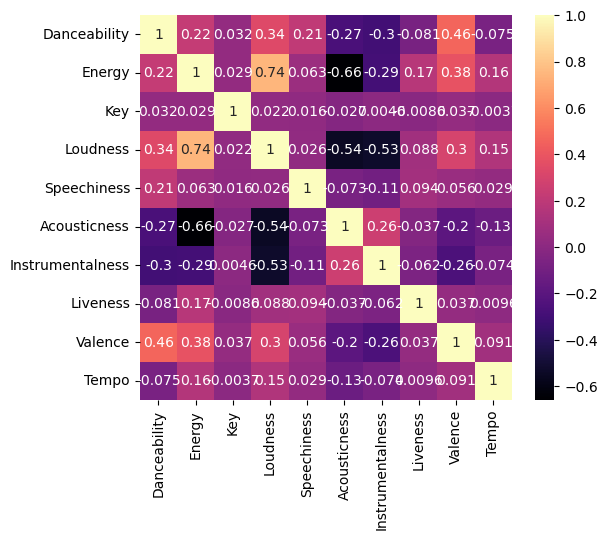

In [227]:
# fig, ax = plt.subplots(figsize=(20, 20)) #მთელი დეითაფრეიმის
# sns.heatmap(df.corr(), cmap='magma', annot=True)

# plt.show()
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df.loc[:, "Danceability":'Tempo'].corr(), cmap='magma', annot=True, ax=ax)

plt.show()

როგორც მოსალოდნელია acousticiness მაღალი უარყოფითი კორელაცია აქვს loudness და energyსთან

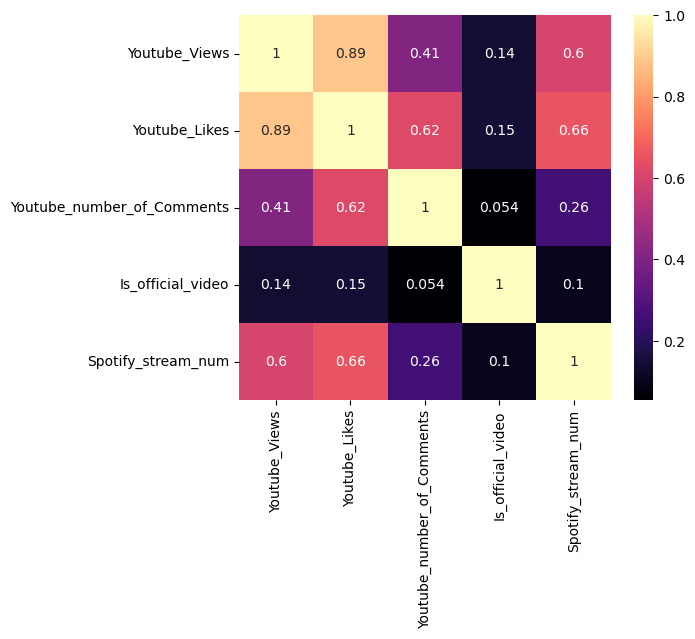

In [228]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df.loc[:, "Youtube_Views":'Spotify_stream_num'].corr(), cmap='magma', annot=True, ax=ax)

plt.show()

აქაც ძალიან კარგი კორელაციები გამოიკვეთა. თავიდან ვიფიქრე ლაიქების მიხედვით იუთუბის ვიუების სვეტს შევავსებდი, მაგრამ სადაც ლაიქი გვქონდა ცნობილი და ვიუ არა, ასეთი მხოლოდ 10 როუ იყო და ათივე ფეარლ ჯემის. გრანჟ ბენდი ტოპ რეიტინგებში მაინც ვერ შევიდოდა(განსაკუთრებით არაოფიციალურ გვერდზე ატვირთული სიმღერებით), რის გამოსაკვლევადაც ვიუების სვეტი გვჭირდება ამიტომ გადავწყვიტე საერთოდ გადამეგდო. შემდეგ ვიფიქრე სპოტიფაისთან კორელაციის შევავსებდი იუთუბის ვიუებს, სპოტიფაის სტრიმებს კი იუთუბის ვიუების მიხედვით მაგრამ ეს კარგი იდეა არ აღმოჩნდა. ჩემი აზრით, არც ამ სვეტების საშუალოთი შევსება იქნებოდა კარგი იდეა ამ ნან ვალუების რადგან ძალიან არააკურატული იქნებოდა და ბოლოს გადავწყვიტე საერთოდ გამექრო NaN ვალუებიანი როუები.
ასევე არტისტებით რო გროუფ ბაი გაგვეკეთებინა და თითოეული არტისტის საშუალო ვიუების რაოდენობით შეგვეძლო ეგეც ძალიან არააკურატული იქნებოდა, რადგან ზოგ არტისტ 1 მილიარდ ნახვიანი სიმღერა აქვს დანარჩენი კი საერთოდ არაცნობილი

In [229]:
df[(df["Youtube_Views"].isna()) & (df["Youtube_Likes"].notna())].shape # როგორც აღვნიშნე 10 როუ ივსებოდა
df[(df["Youtube_Views"].isna()) & (df["Spotify_stream_num"].notna())].shape # ასე 403
#m=(df['Youtube_Views']/df['Spotify_stream_num']).mean()
#d=(df['Spotify_stream_num']/df['Youtube_Views']).mean()
#df.loc[df['Youtube_Views'].isna(),'Youtube_Views'] = df.loc[df['Youtube_Views'].isna(),'Spotify_stream_num'] * m 
#df.loc[df['Spotify_stream_num'].isna(),'Spotify_stream_num'] = df.loc[df['Spotify_stream_num'].isna(),'Youtube_Views'] * d
#print(d,m) #d გამოდიოდა 2700 და m გამოდიოდა 2 და კორელაციაც საერთოდ ირეოდა.
df.dropna(axis=0,inplace=True)


უფრო კარგად რომ შევხედოთ სპოტიფაის სტრიმებს და იუთუბის ვიუებს, სკატერ პლოტი ავაგოთ

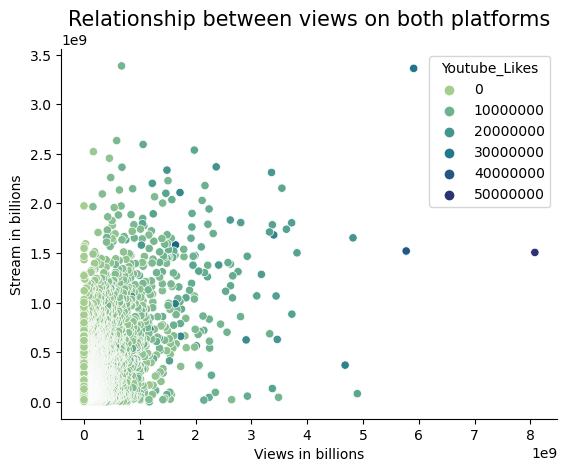

In [230]:
fig = sns.scatterplot(df,x='Youtube_Views',y='Spotify_stream_num',hue='Youtube_Likes', palette='crest')
fig.set_ylabel("Stream in billions")
fig.set_xlabel("Views in billions")
fig.set_title("Relationship between views on both platforms",fontsize=15)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)



ეს პლოტი კარგად აჩვენებს იუთუბ და სპოტიფაის ვიუების ენთრიების ფარდობების საშუალო და პირიქით ფარდობების საშუალო რატომაა ასე მკვეთრად განსხვავებული რიცხვები. სპოტიფაის სტრიმები 2 მილიარდამდე ძალიან ბევრ სიმღერას აქვს, იუთუბის შედარებით ნაკლებს მაგრამ სამაგიეროდ იუთუბის ზოგიერთ სიმღერას 4,5 და 8 მილიარდი ნახვაც კი აქვს 

# ვიზუალიზაციები

თავდაპირველად ვნახოთ თუ რა პროცენტულობითაა სიმღერები რომლებიც სინგლებია და სიმღერები, რომლებიც ალბუმში შედის.შემდეგ გავარკვიოთ, რომლები უფრო პოპულარულებია 

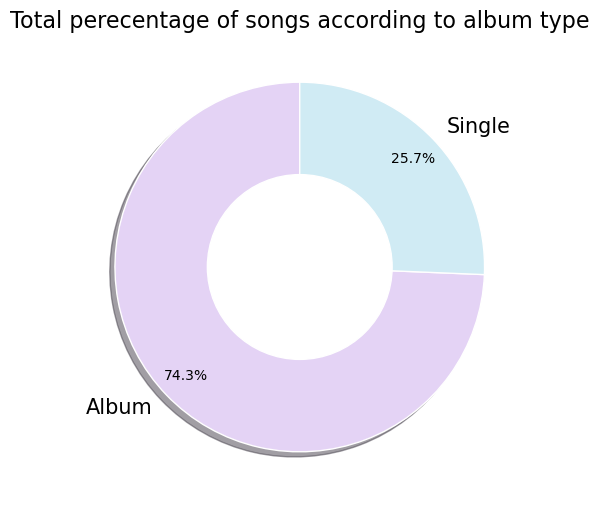

In [231]:
values=df['Album_type'].value_counts().values.tolist()
labels=df['Album_type'].value_counts().index.tolist()
colors = ["#E4D3F5","#D0EBF4"]
label_format = '%1.1f%%'
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(values, labels=labels, colors=colors, 
                                  autopct=label_format, startangle=90, shadow=True,
                                  wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                  textprops={'fontsize': 12, 'color': 'black'},
                                  pctdistance=0.85)
for text in texts:
    text.set_fontsize(15)

for autotext in autotexts:
    autotext.set_fontsize(10)
center_circle = plt.Circle((0, 0), 0.5, color='white')
center_square = plt.Rectangle((-0.5,-0.5),1,1,color='white')
ax.add_artist(center_circle)
plt.title('Total perecentage of songs according to album type', fontsize=16)
plt.show()


C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\4274979457.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_view_album = df.groupby('Album_type').sum().sort_values('Youtube_Views', ascending=False).reset_index()


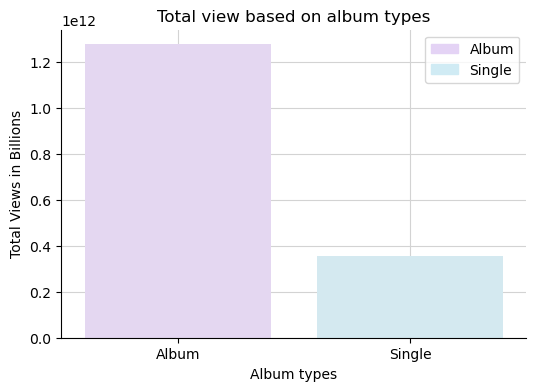

In [232]:
colors = ["#E4D3F5", "#D0EBF4"]
most_view_album = df.groupby('Album_type').sum().sort_values('Youtube_Views', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=most_view_album, y='Youtube_Views', x='Album_type', palette=colors, ax=ax)
ax.set_title("Total view based on album types")
ax.set_ylabel("Total Views in Billions")
ax.set_xlabel("Album types")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, linestyle='-', color='lightgray')
ax.yaxis.grid(True, linestyle='-', color='lightgray')
ax.set_axisbelow(True)
legend_labels = ['Album', 'Single']
legend_colors = ['#E4D3F5', '#D0EBF4']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_handles, legend_labels)

plt.show()


ჩანს რომ სიმღერები, რომლებიც ალბუმებშია უფრო მეტ ნახვას აგროვებენ ვიდრე სინგლები. სავარადოდ, ამიტომაცაა რომ ბევრად ნაკლები სინგლი გამოდის ვიდრე ალბუმი. ბარ პლოტების გამოყენება ძალიან ბევრჯერ დაგვჭირდება, ამიტომ დავწეროთ ორი ფუნქცია: ერთი რომელიც ერთ ბარ პლოტს დაგვიხატავს და მეორე რომელიც ორს დაგვიხატავს გვერდიგვერდ

In [233]:
def double_barplot(top1,x_column1,y_column1,palette1,title1,xlabel1,top2,x_column2,y_column2,palette2,title2,xlabel2,main_title):
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (20,20))
    sns.barplot(top1,x=x_column1,y=y_column1,palette=palette1,ax=ax1)
    ax1.set_title(title1,fontsize=30)
    ax1.set_xlabel(xlabel1,fontsize=15)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.xaxis.grid(True, linestyle='-', color='lightgray')
    ax1.set_axisbelow(True)
    
    sns.barplot(top2,x=x_column2,y=y_column2,palette=palette2,ax=ax2)

    ax2.set_title(title2,fontsize=30)
    ax2.set_xlabel(xlabel2,fontsize=15)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.xaxis.grid(True, linestyle='-', color='lightgray')
    ax2.set_axisbelow(True)
    fig.suptitle(main_title,fontsize=40)
def barplot(top,x_column,y_column,palette,title,xlabel,rotation,main_title):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize= (10,5))
    sns.barplot(top,x=x_column,y=y_column,palette=palette,ax=ax)
    ax.set_title(title,fontsize=15)
    ax.set_xlabel(xlabel,fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.grid(True, linestyle='-', color='lightgray')
    ax.set_axisbelow(True)
    plt.xticks(rotation=rotation, ha='right')
    fig.suptitle(main_title,fontsize=20)
    

ახლა ყველაზე ლოგიკური იქნება შევხედოთ იუთუბის და სპოტიფაის ყველაზე ნახვადი სიმღერების ტოპ ათეულს

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\3479768103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_views_yt= df.groupby('Track').mean().sort_values('Youtube_Views',ascending=False).reset_index().head(10)
C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\3479768103.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_streams = df.groupby('Track').sum().sort_values('Spotify_stream_num',ascending=False).reset_index().head(10)
C:\Users\Takileptop\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  f

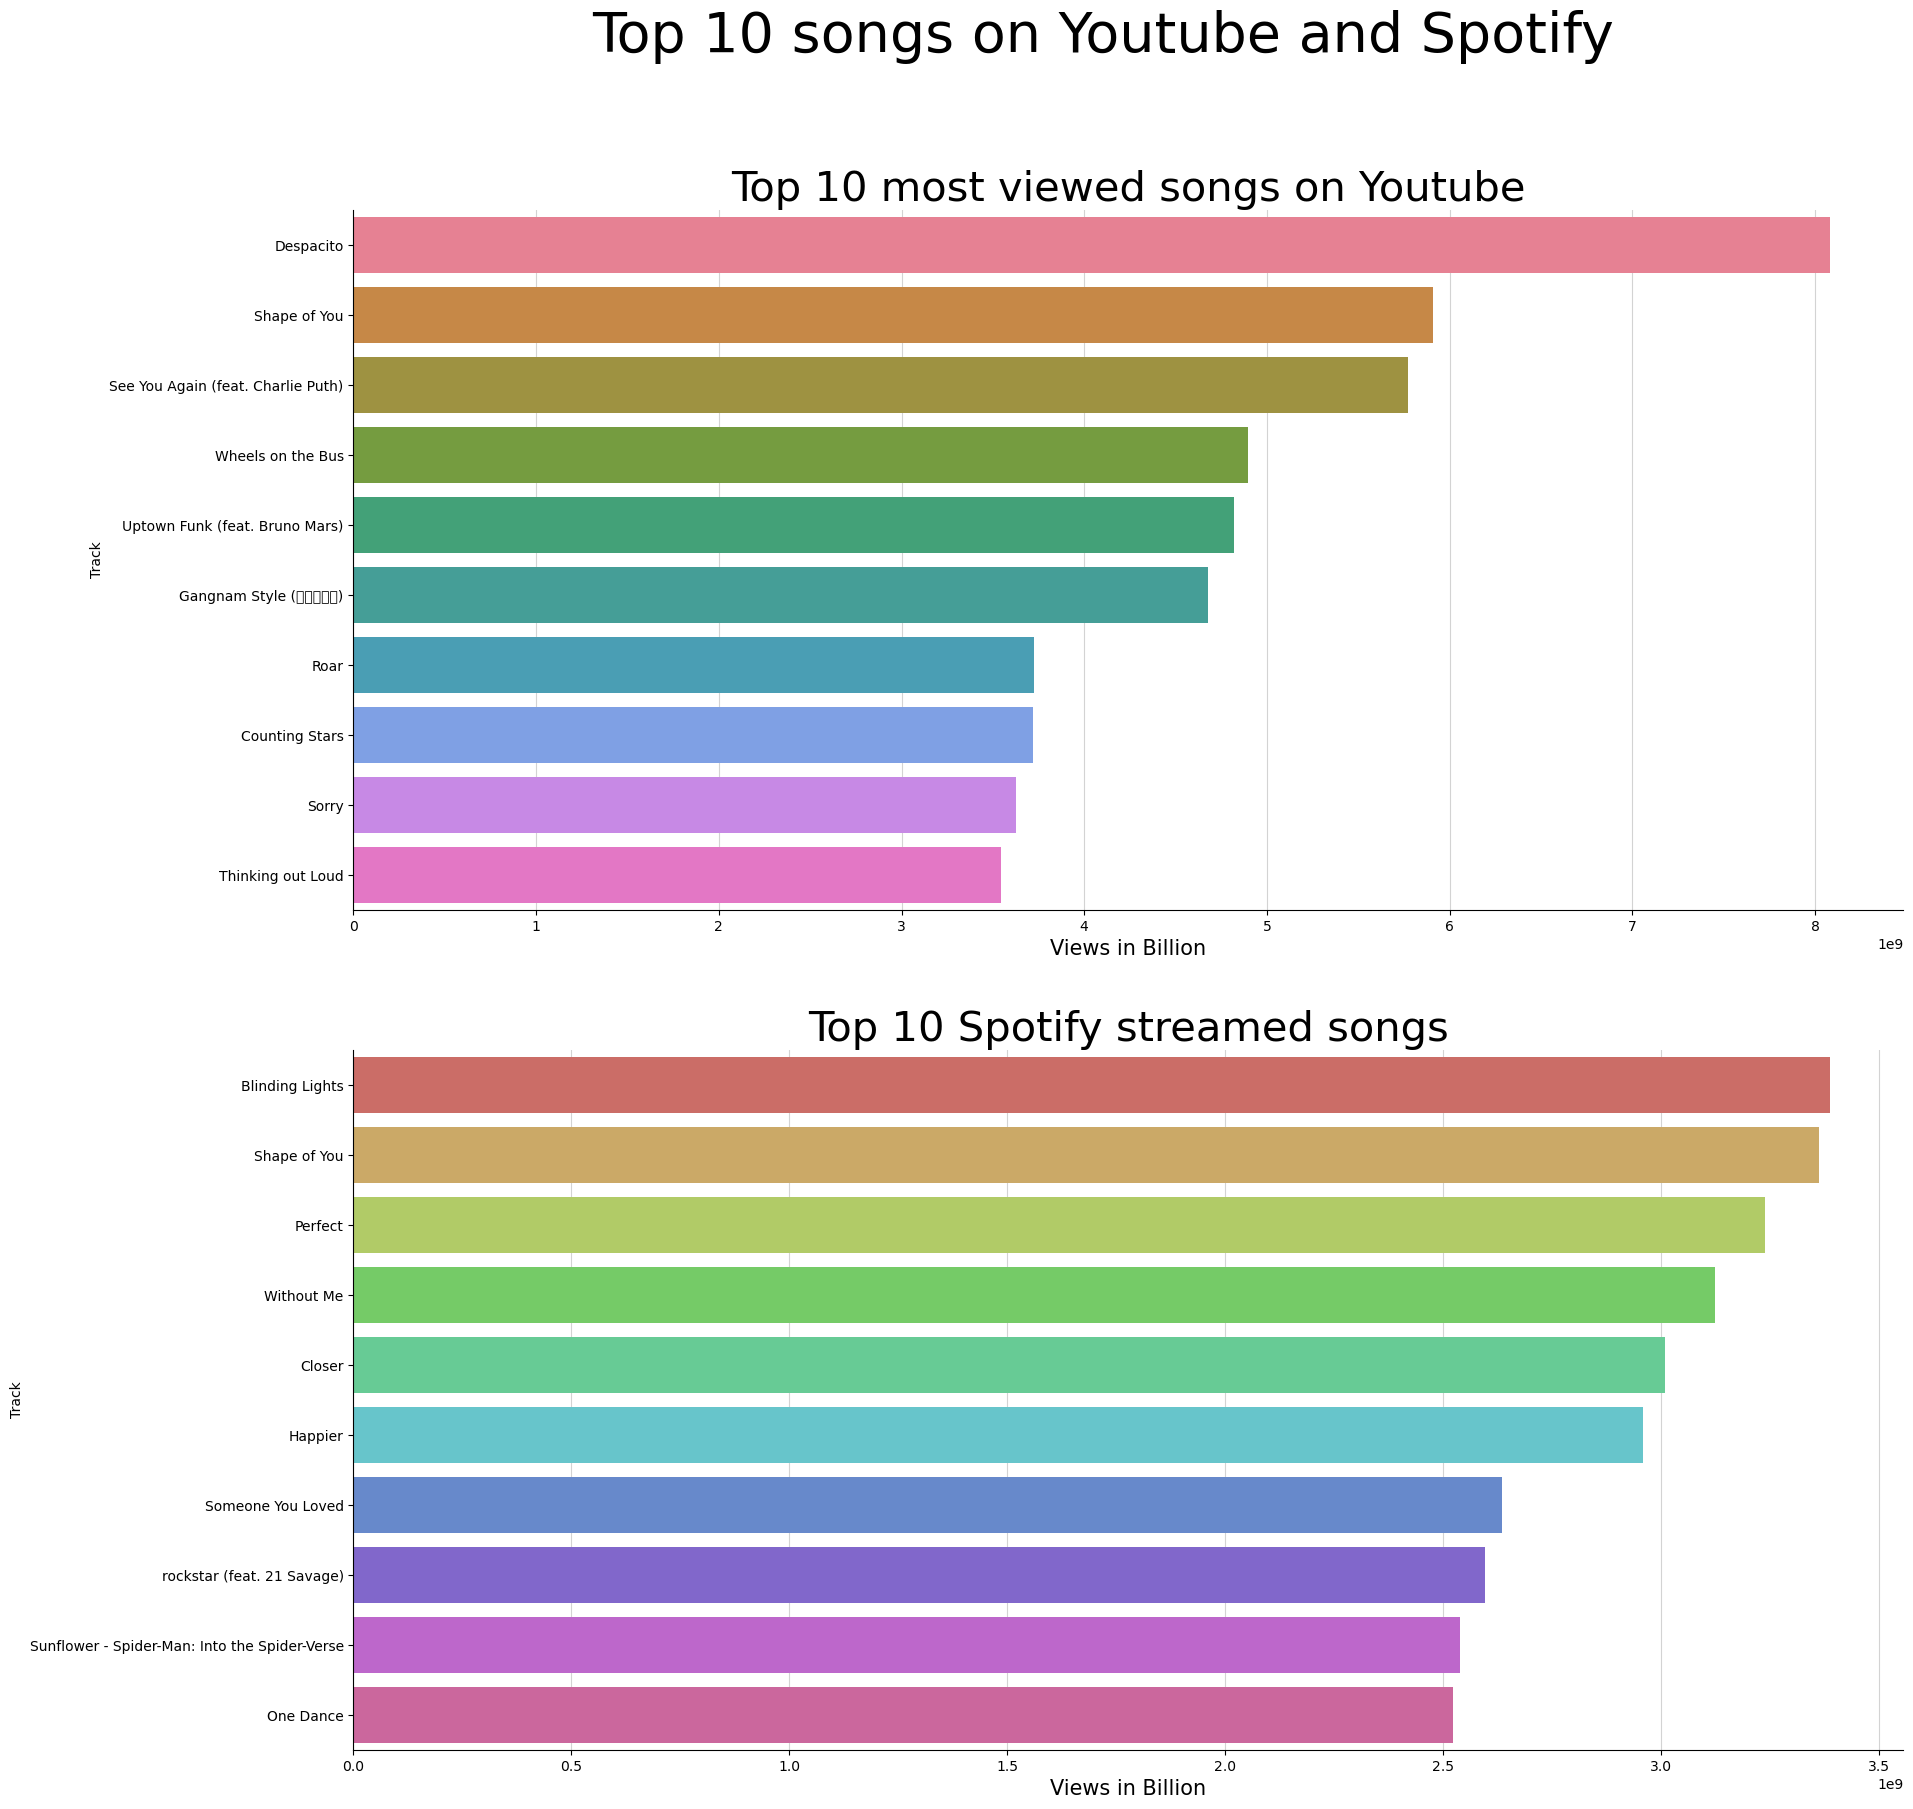

In [234]:
top_views_yt= df.groupby('Track').mean().sort_values('Youtube_Views',ascending=False).reset_index().head(10)
top_streams = df.groupby('Track').sum().sort_values('Spotify_stream_num',ascending=False).reset_index().head(10)
double_barplot(top_views_yt,'Youtube_Views','Track',"husl","Top 10 most viewed songs on Youtube","Views in Billion",top_streams,'Spotify_stream_num','Track',"hls","Top 10 Spotify streamed songs","Views in Billion","Top 10 songs on Youtube and Spotify")

საკმაოდ განსხვავებული სიმღერებია.ამ ჩართებიდან შეგვიძლია დავასკვნათ რომ ედ შირანის shape of you ორივე პლატფორმაზე ძალიან პოპულარულია, თუმცა სიმღერების უმეტესობა განსხვავებულია ამ ორი პლატფორმის ტოპ 10სთვის. იუთუბზე უფრო ძველი სიმღერებია მეტი ნახვებით, სპოტიფაიზე შედარებით ახალი ჰიტები. ასევე იუთუბზე ხშირად ძალიან ბევრ ნახვას აგროვებს ბავშვებისთვის განკუთვნილი სიმღერები, როგორიცაა Wheels on the bus.

ახლა შევხედოთ იუთუბის ყველაზე მეტ ლაიქიან და კომენტარიან სიმღერებს

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\2826982617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_liked= df.groupby('Track').mean().sort_values('Youtube_Likes',ascending=False).reset_index().head(10)
C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\2826982617.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_commented = df.groupby('Track').sum().sort_values('Youtube_number_of_Comments',ascending=False).reset_index().head(10)
C:\Users\Takileptop\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current fo

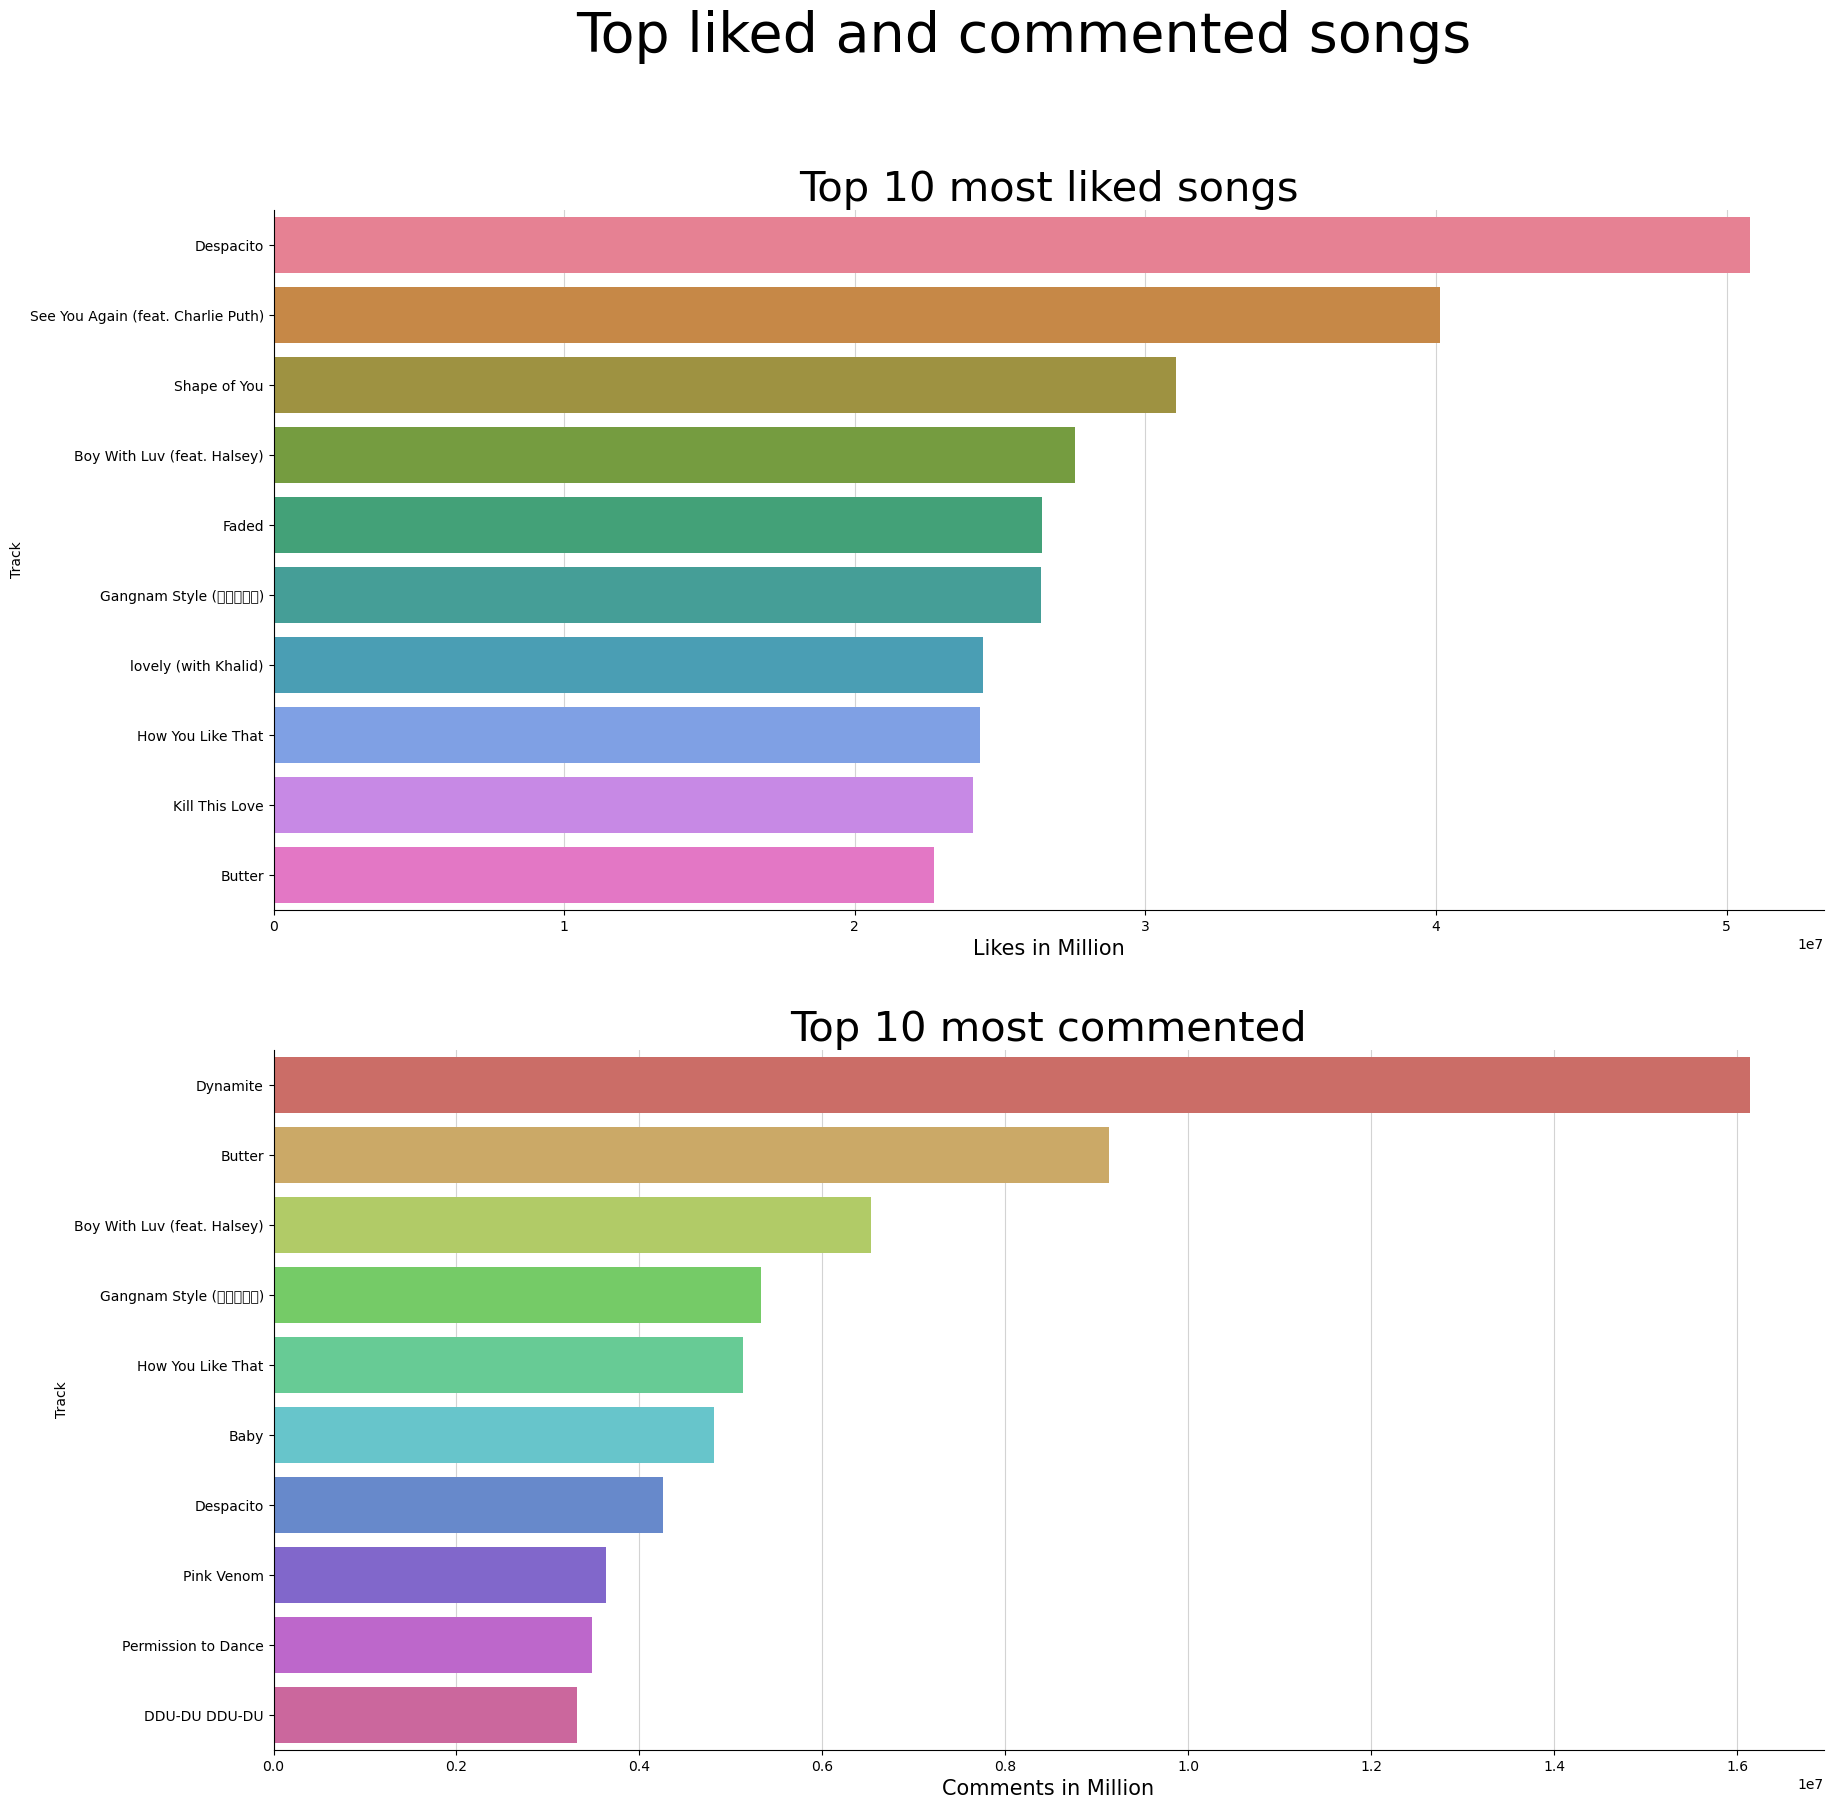

In [235]:
top_liked= df.groupby('Track').mean().sort_values('Youtube_Likes',ascending=False).reset_index().head(10)
top_commented = df.groupby('Track').sum().sort_values('Youtube_number_of_Comments',ascending=False).reset_index().head(10)
double_barplot(top_liked,'Youtube_Likes','Track',"husl","Top 10 most liked songs","Likes in Million",top_commented,'Youtube_number_of_Comments','Track',"hls","Top 10 most commented","Comments in Million","Top liked and commented songs")

აქ საინტერესოა ის რომ ყველაზე მეტ ლაიქიანი სიმღერები მეტ-ნაკლებად ემთხვევა ყველაზე მეტ ნახვებიანებს, მაგრამ ყველაზე მეტ კომენტარიანი სიმღერები სრულიად განსხვავებულებია. შევხედოთ ყველაზე მეტ კომენტარებიან არტისტებსაც

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\495777799.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_commented_artist = df.groupby('Artist').sum().sort_values('Youtube_number_of_Comments',ascending=False).reset_index().head(10)


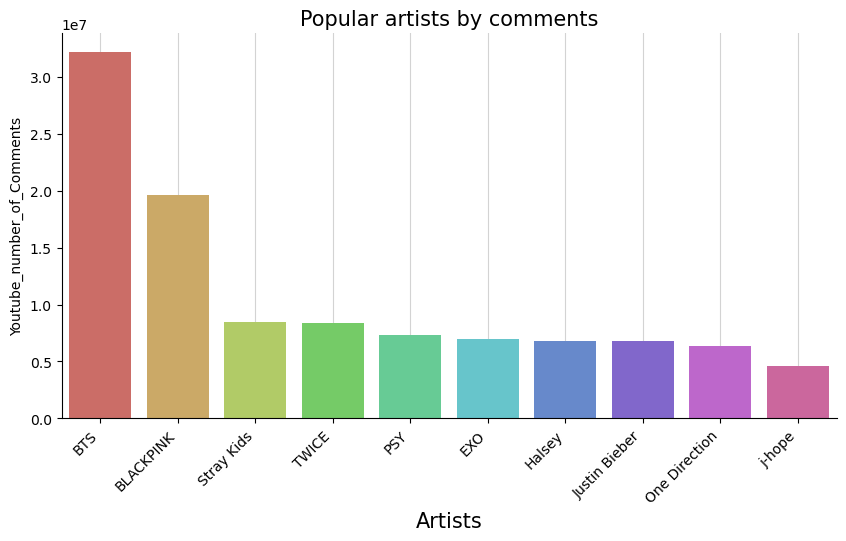

In [236]:
top_commented_artist = df.groupby('Artist').sum().sort_values('Youtube_number_of_Comments',ascending=False).reset_index().head(10)
barplot(top_commented_artist,'Artist','Youtube_number_of_Comments',"hls","Popular artists by comments","Artists",45,"")

აქ შესული თითქმის ყველა არტისტი კ-პოპ გრუფია. ეს გრუფები განსაკუთრებული პოპულარობით სარგებლობენ ბავშვებში. იგივე შეიძლება ითქვას ჯასტინ ბიბერზე და ვან დირექშენზე. სავარაუდოდ, ბავშვები სპამავდნენ ბევრ კომენტარს და ეს სტატისტიკა მაგ ფაქტით აიხსნება.

ახლა ვნახოთ ისეთი არტისტები, რომლებიც პოპულარულები არიან ორივე პლატფორმის ვიუების და სტრიმების ჯამით

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\522649169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_top_artists= df.groupby('Artist').sum()


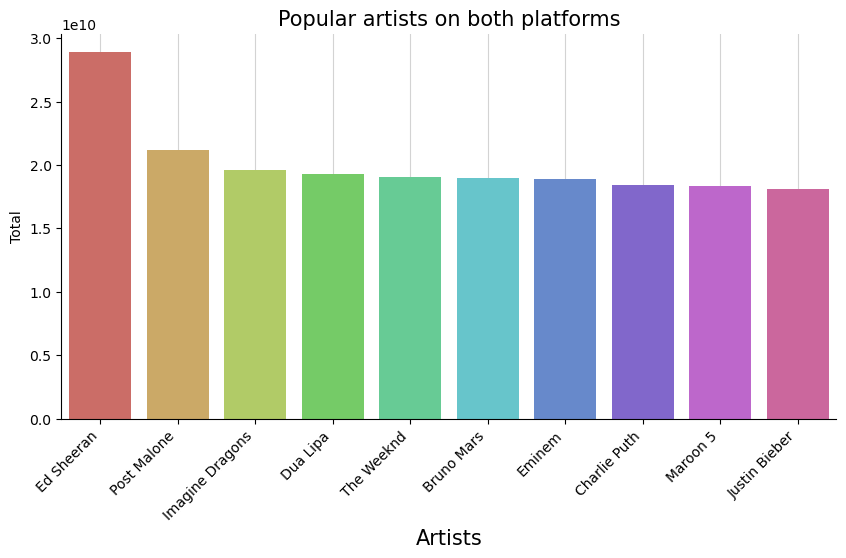

In [237]:
total_top_artists= df.groupby('Artist').sum()
total_top_artists['Total'] = total_top_artists['Youtube_Views'] +total_top_artists['Spotify_stream_num']
total_top_artists =total_top_artists.sort_values('Total',ascending=False).reset_index().head(10)

barplot(total_top_artists,'Artist','Total',"hls","Popular artists on both platforms","Artists",45,"")

როგორც მოსალოდნელი იყო ორივე პლატფორმაზე ყველაზე პოპულარული არტისტი ედ შირანი გამოვიდა.

ვნახოთ სპოტიფაის ყველაზე გასტრიმვადი არტისტის(ვიქენდის), იუთუბის ყველაზე ნახვადი არტისტის(ლუის ფონსის) და ამ ორში ჯამურად ყველაზე პოპულარული არტისტის (ედ შირანის) სხვა სიმღერებიც

C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\3389493177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_sheeran = df.groupby(['Artist','Track']).sum().reset_index()
C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\3389493177.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  luis_fonsi=df.groupby(['Artist','Track']).sum().reset_index()
C:\Users\Takileptop\AppData\Local\Temp\ipykernel_32200\3389493177.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

Text(0.5, 0.98, '')

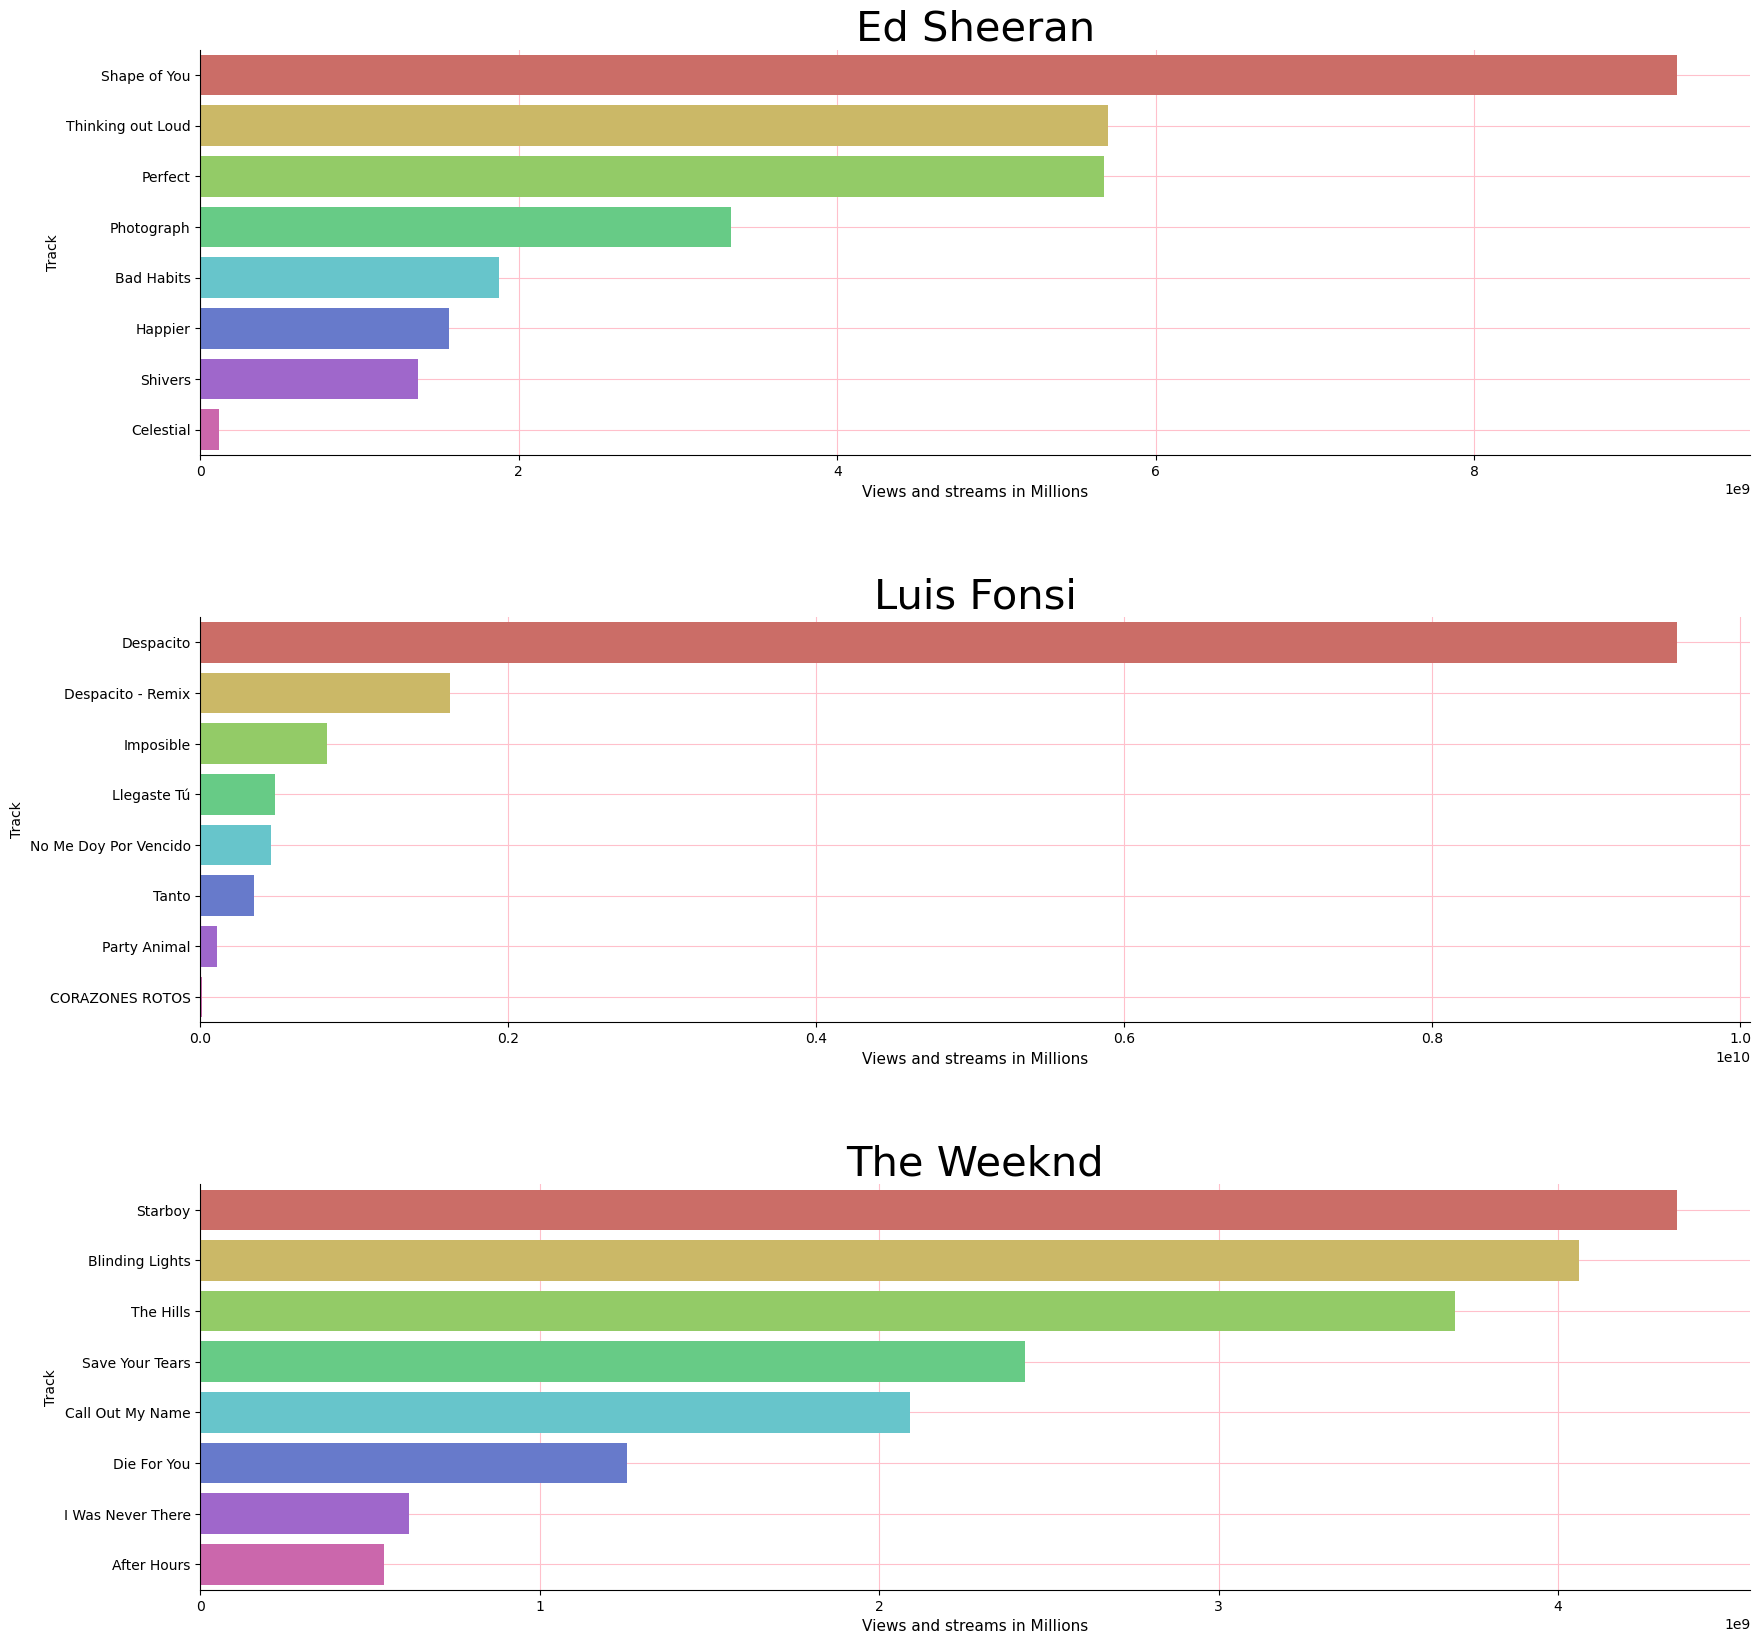

In [238]:
ed_sheeran = df.groupby(['Artist','Track']).sum().reset_index()
ed_sheeran = ed_sheeran[ed_sheeran['Artist'] == 'Ed Sheeran']
ed_sheeran['topsongs1'] = ed_sheeran['Youtube_Views']  + ed_sheeran['Spotify_stream_num']
ed_sheeran = ed_sheeran.sort_values('topsongs1',ascending=False)
luis_fonsi=df.groupby(['Artist','Track']).sum().reset_index()
luis_fonsi=luis_fonsi[luis_fonsi['Artist'] == 'Luis Fonsi']
luis_fonsi['topsongs2'] = luis_fonsi['Youtube_Views']  + luis_fonsi['Spotify_stream_num']
luis_fonsi = luis_fonsi.sort_values('topsongs2',ascending=False)
weeknd=df.groupby(['Artist','Track']).sum().reset_index()
weeknd=weeknd[weeknd['Artist'] == 'The Weeknd']
weeknd['topsongs3'] = weeknd['Youtube_Views']  + weeknd['Spotify_stream_num']
weeknd = weeknd.sort_values('topsongs3',ascending=False)


fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize= (20,20))
sns.barplot(ed_sheeran,x='topsongs1',y='Track',palette="hls",ax=ax1)
ax1.set_title("Ed Sheeran",fontsize=30)
ax1.set_xlabel("Views and streams in Millions",fontsize=11)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.grid(True, linestyle='-', color='pink')
ax1.yaxis.grid(True, linestyle='-', color='pink')
ax1.set_axisbelow(True)

sns.barplot(luis_fonsi,x='topsongs2',y='Track',palette="hls",ax=ax2)
plt.subplots_adjust(hspace=0.4)
ax2.set_title("Luis Fonsi",fontsize=30)
ax2.set_xlabel("Views and streams in Millions",fontsize=11)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.grid(True, linestyle='-', color='pink')
ax2.yaxis.grid(True, linestyle='-', color='pink')
ax2.set_axisbelow(True)

sns.barplot(weeknd,x='topsongs3',y='Track',palette="hls",ax=ax3)
plt.subplots_adjust(hspace=0.4)

ax3.set_title("The Weeknd",fontsize=30)
ax3.set_xlabel("Views and streams in Millions",fontsize=11)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.xaxis.grid(True, linestyle='-', color='pink')
ax3.yaxis.grid(True, linestyle='-', color='pink')
ax3.set_axisbelow(True)
fig.suptitle("",fontsize=40)

ეს პლოტებიც საინტერესოა რადგან 3 მომღერლიდან 2ს თუ შევხედავთ ვხედავთ რომ სხვა სიმღერებიც პოპულარული აქვთ 1 ჰიტის გარდა, ლუის ფონსის მეორე ყველაზე პოპულარული სიმღერა კი ისევ დესპასიტოს რემიქსია. დიდი ალბათობით მხოლოდ ერთი სიმღერა გამოუვიდა პოპულარული და ამის შემდეგ მისი ცნობადობა დაიკლებს. საინტერესო იქნება ისეთი არტისტების სიაც შევადგინოთ რომლებსაც რამდენიმე სიმღერა მაინც აქვთ ტოპ 1000 სიმღერაში რომ მოხვდა ნახვებით

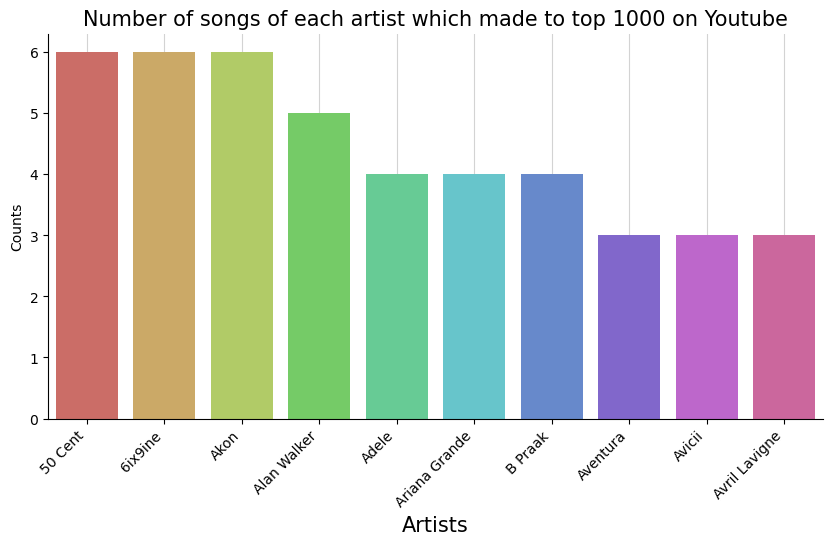

In [239]:
sorted_songs= df.sort_values(by='Youtube_Views', ascending=False)
artist_counts = sorted_songs.head(1000).groupby('Artist').size()
popular_artists= artist_counts[artist_counts >= 3].reset_index().head(10)
artists = popular_artists['Artist']
counts = popular_artists[0].rename("Counts")
popular_artists=popular_artists.sort_values(by=0, ascending=False) # თავიდან 0 ერქვა ამ ქაუნთების ქოლუმნს და მერე გადავარქვი მაგრამ აქ "Counts"ს რო ვწერდი აერორებდა




barplot(popular_artists,popular_artists['Artist'],counts,"hls","Number of songs of each artist which made to top 1000 on Youtube","Artists",45,"")


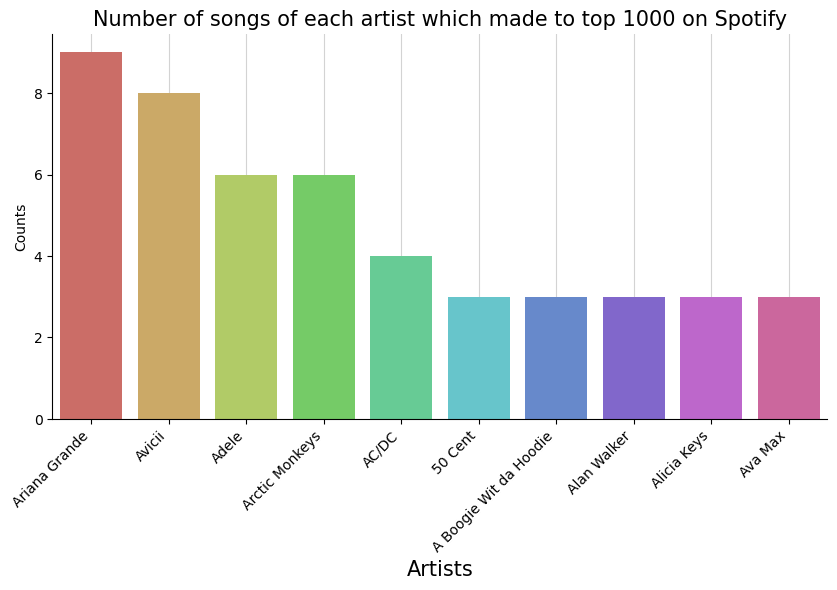

In [240]:
sorted_songs= df.sort_values(by='Spotify_stream_num', ascending=False)
artist_counts = sorted_songs.head(1000).groupby('Artist').size()
popular_artists= artist_counts[artist_counts >= 3].reset_index().head(10)
artists = popular_artists['Artist']
counts = popular_artists[0].rename("Counts")
popular_artists=popular_artists.sort_values(by=0, ascending=False)




barplot(popular_artists,popular_artists['Artist'],counts,"hls","Number of songs of each artist which made to top 1000 on Spotify","Artists",45,"")

ამ მომღერლებზე შეიძლება ითქვას რომ მათ გამოშვებულ სიმღერებს დიდი შანსი აქვთ წარმატებას მიაღწიონ. ამ სტატისტიკის მიხედვით ყველაზე მეტ სიმღერას, რომელიც შემდეგ ტოპ 1000ში ხვდება ორივე პლატფორმაზე უშვებენ არიანა გრანდე, ადელი, ალან ვოკერი, 50 ცენტი და Avicii


# მუსიკალური მახასიათებლები

ახლა ვნახოთ სიმღერები მუსიკალური მახასიათებლების მიხედვით. პირველ რიგში ვნახოთ იუთუბზე ისეთი სიმღერები რომლებიც პოპულარულებია და ასევე მაღალი Danceability აქვთ


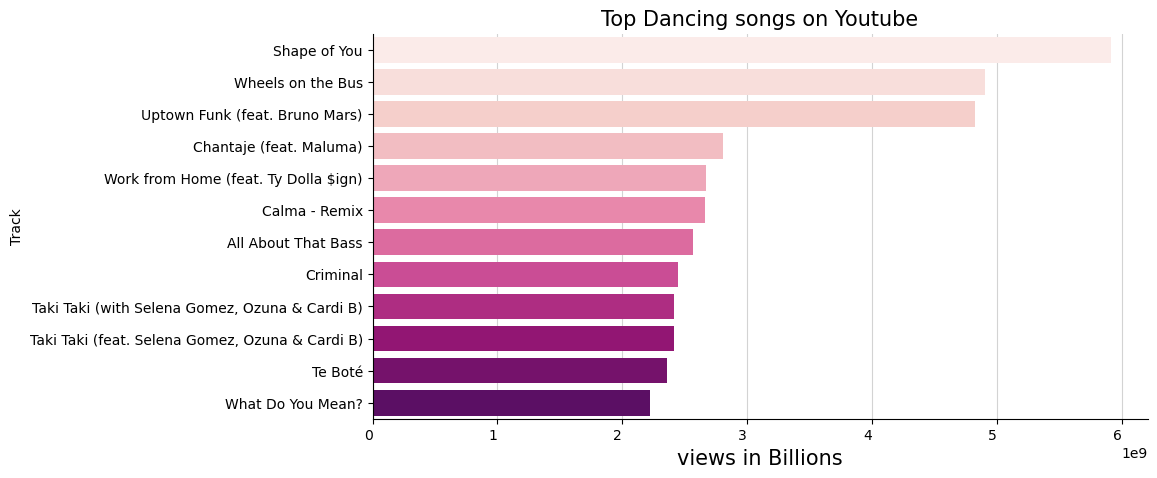

In [241]:
filtered_songs = df[df['Danceability'] > 0.8]
sorted_songs = filtered_songs.sort_values(by='Youtube_Views', ascending=False)
top_songs = sorted_songs.head(12)

barplot(top_songs,'Youtube_Views',"Track","RdPu","Top Dancing songs on Youtube","views in Billions",0,"")

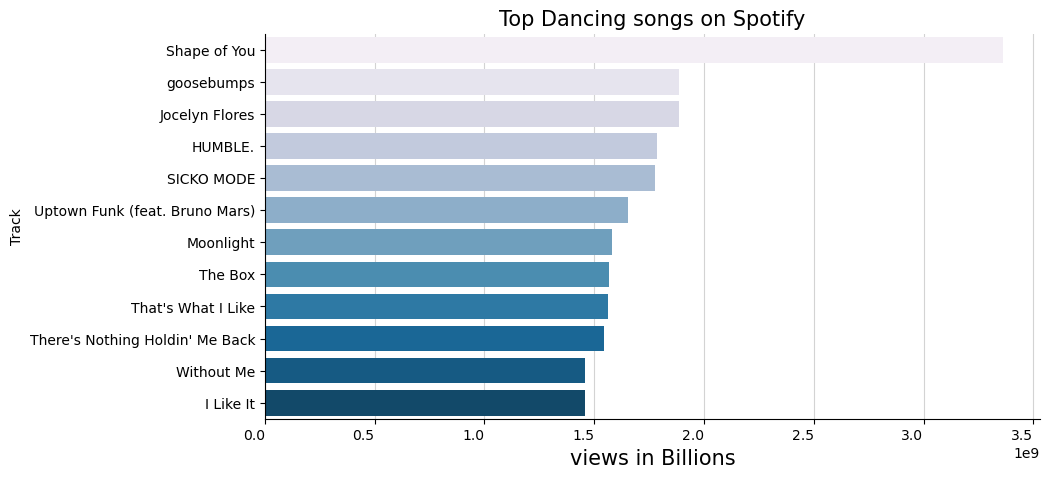

In [242]:
filtered_songs = df[df['Danceability'] > 0.8]
sorted_songs = filtered_songs.sort_values(by="Spotify_stream_num", ascending=False)
top_songs = sorted_songs.head(12)

barplot(top_songs,'Spotify_stream_num',"Track","PuBu","Top Dancing songs on Spotify","views in Billions",0,"")

Shape of you აქაც ლიდერობს მაგრამ ძირითადად სიმღერები განსხვავდება. საბოლოოდ, შეიძლება დასკვნა რომ სპოტიფაის და იუთუბის ტოპები საკმაოდ განსხვავებულია ერთმანეთისგან.
ასევე საინტერესოა ისეთი სიმღერების სტატისტიკაც რომლებიც 10 წუთზე მეტხანს გრძელდება და პოპულარულები არიან


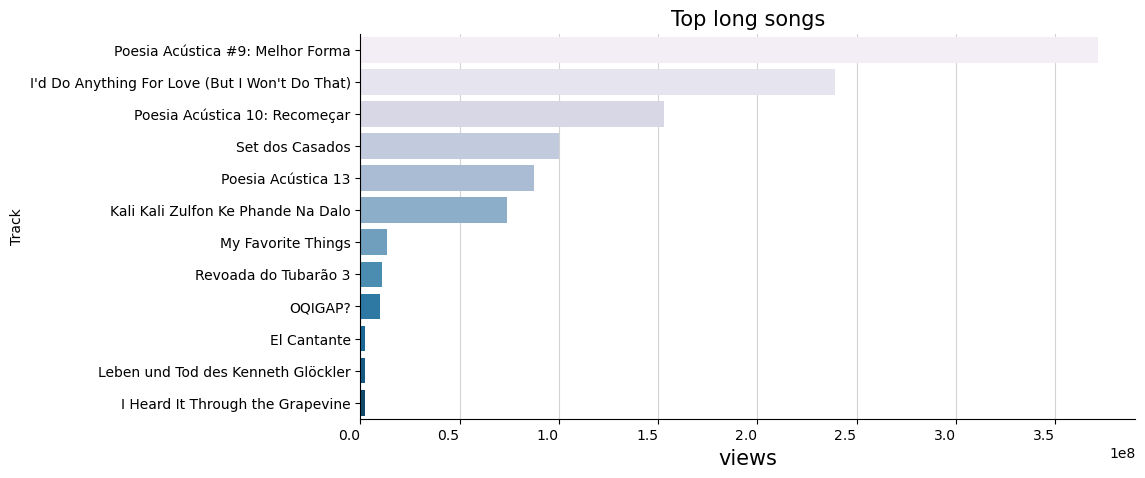

In [243]:
filtered_songs = df[(df['Duration_ms'] > 600000) & (df['Duration_ms'] < 1.2e+6) & (df['Instrumentalness'] < 0.7) ]
sorted_songs = filtered_songs.sort_values(by='Youtube_Views', ascending=False)
top_songs = sorted_songs.head(12)
#barplot(top,x_column,y_column,palette,title,xlabel,main_title)

barplot(top_songs,'Youtube_Views',"Track","PuBu","Top long songs","views",0,"")

Instrumentalness -თაც გავფილტრე, რადგან ზღვის ტალღების ხმები და მსგავსი ვიდეოები არ ამოეგდო. აქ მეგონა როკს/მეტალს ან ფილმების ost ებს ამოაგდებდა, სხვა ტიპის თრექები ამოაგდო ძირითადად, საკმაოდ უსარგებლო სტატისტიკა გამოდგა.

როდესაც სვეტებს ვიკვლევდი, აღმოვაჩინე, რომ valence არის ინდიკატორი იმის თუ პოზიტიურია თუ ნეგატიური მუსიკა. გამოვიკვლიოთ ტოპ პოზიტიური და ნეგატიური თრექები ორივესთვის

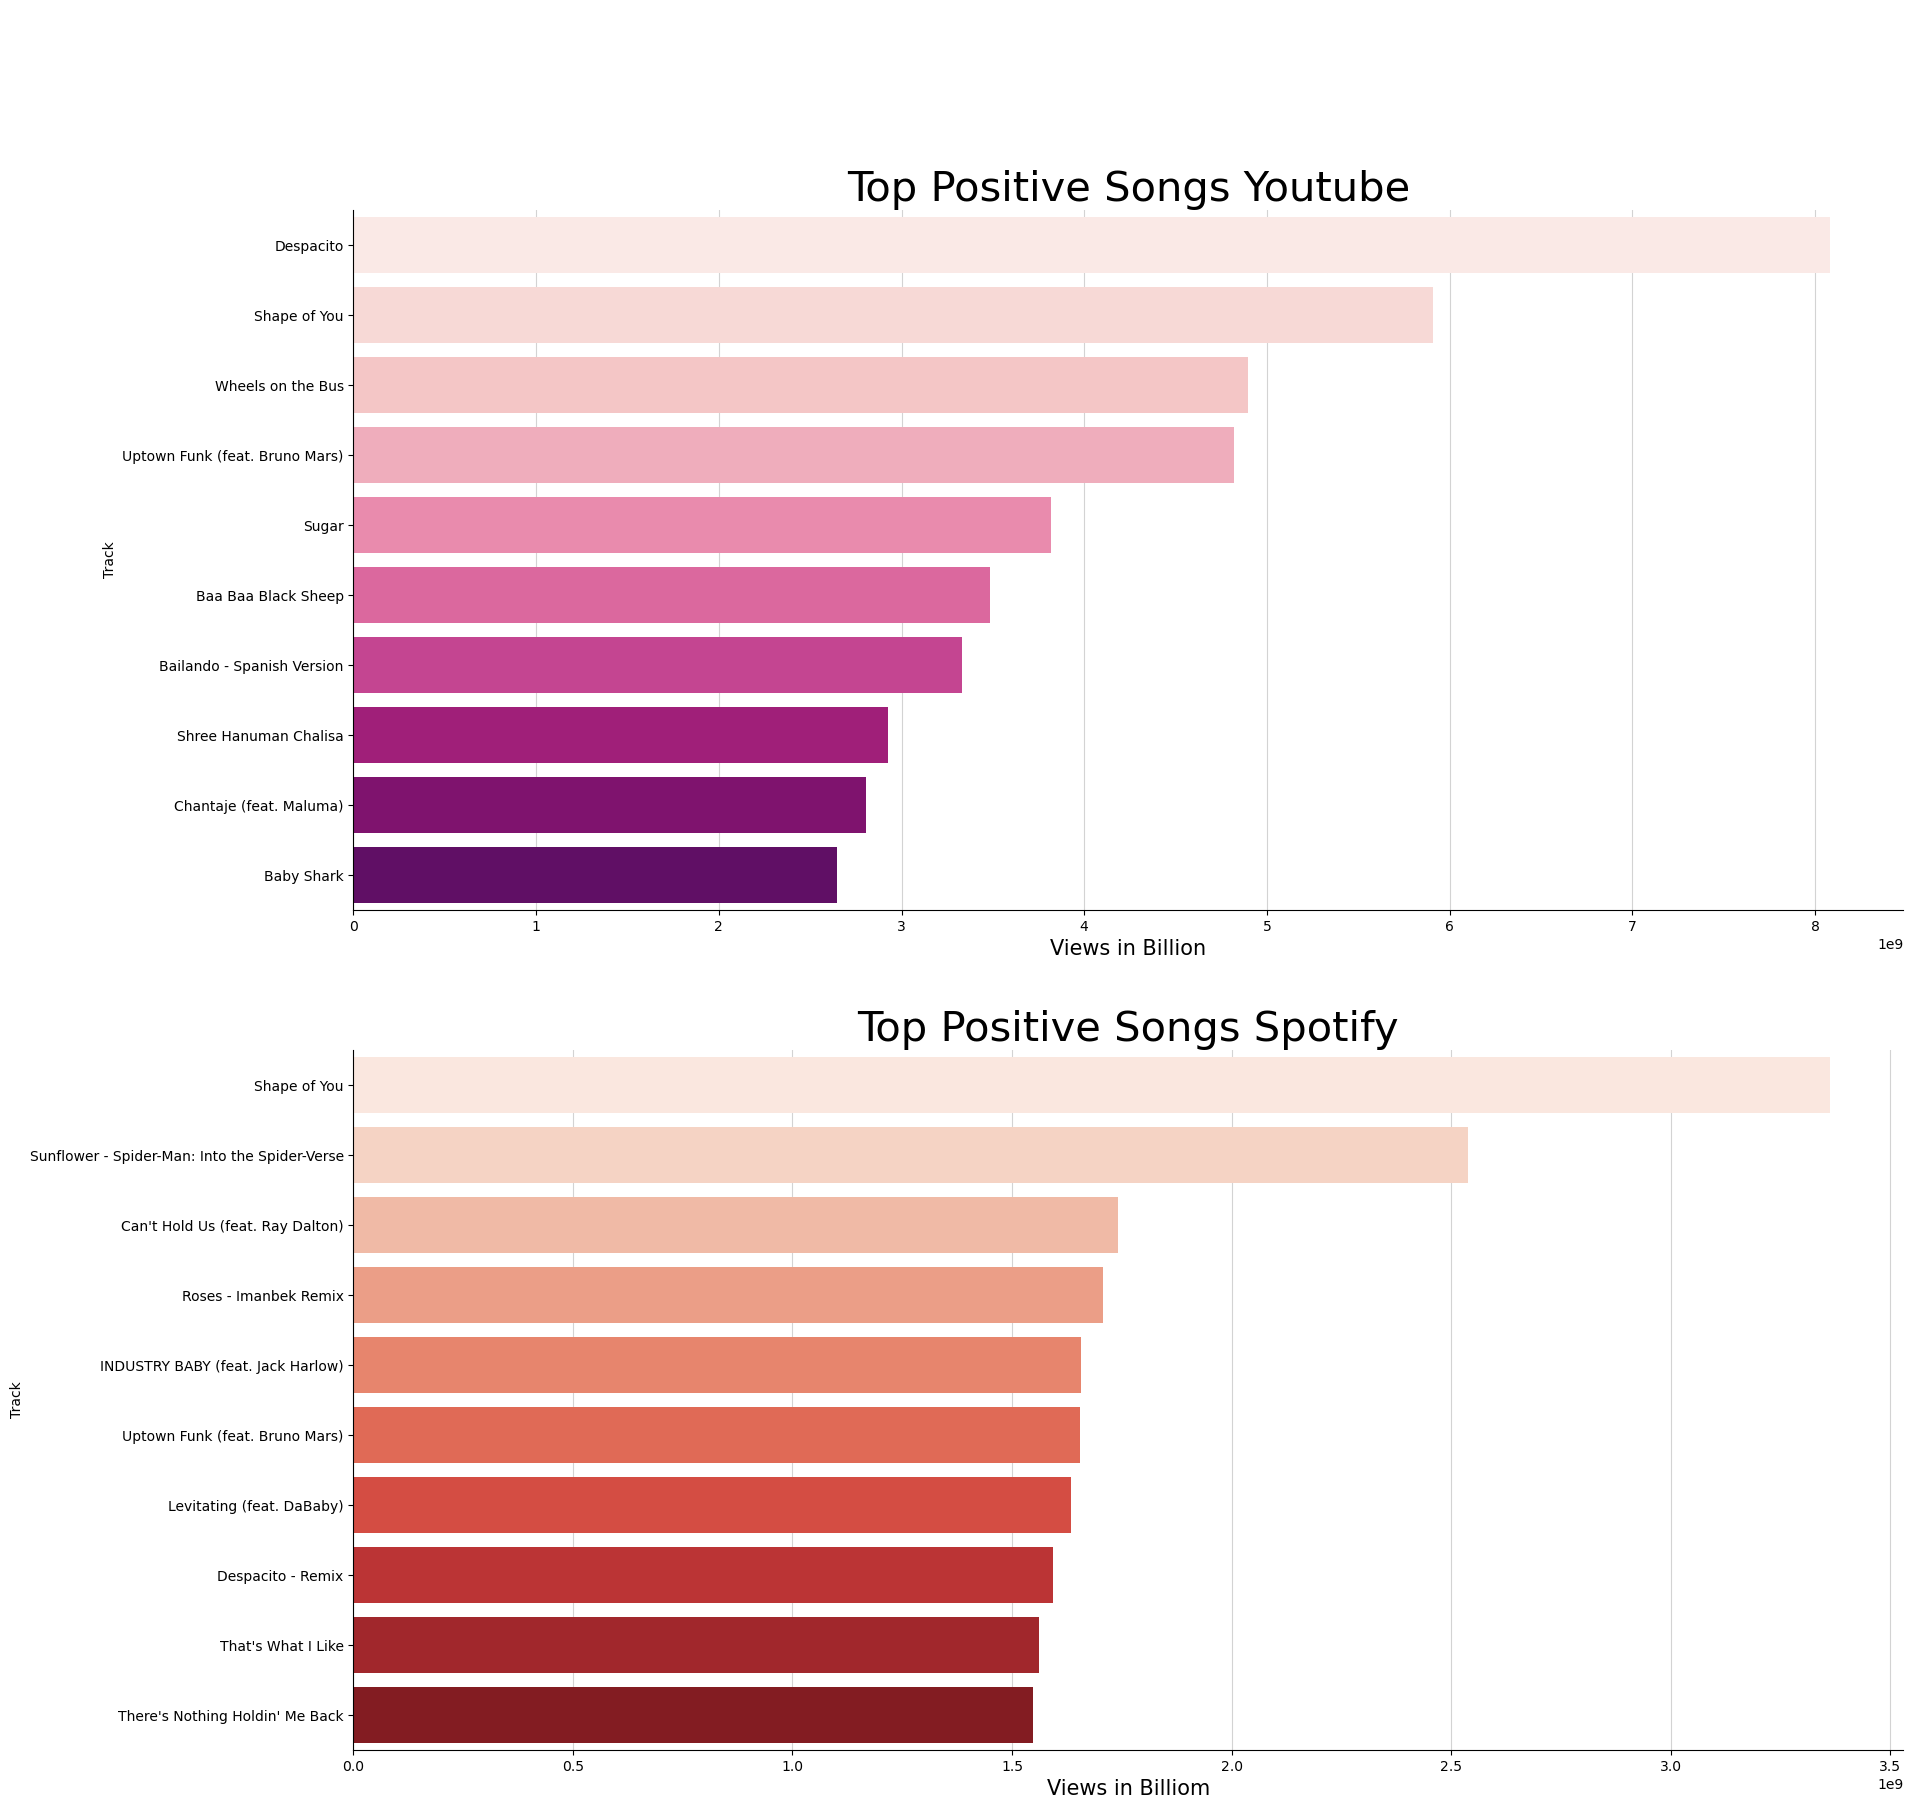

In [244]:
filtered_songs1 = df[df['Valence'] > 0.8]
sorted_songs1 = filtered_songs1.sort_values(by='Youtube_Views', ascending=False)
top_songs1 = sorted_songs1.head(10)
#barplot(top,x_column,y_column,palette,title,xlabel,main_title)
filtered_songs2 = df[df['Valence'] > 0.8]
sorted_songs2 = filtered_songs2.sort_values(by='Spotify_stream_num', ascending=False)
top_songs2 = sorted_songs2.head(10)
#double_barplot(top1,x_column1,y_column1,palette1,title1,xlabel1,top2,x_column2,y_column2,palette2,title2,xlabel2,main_title)

double_barplot(top_songs1,"Youtube_Views","Track","RdPu","Top Positive Songs Youtube","Views in Billion",top_songs2,"Spotify_stream_num","Track","Reds","Top Positive Songs Spotify","Views in Billiom"," ")

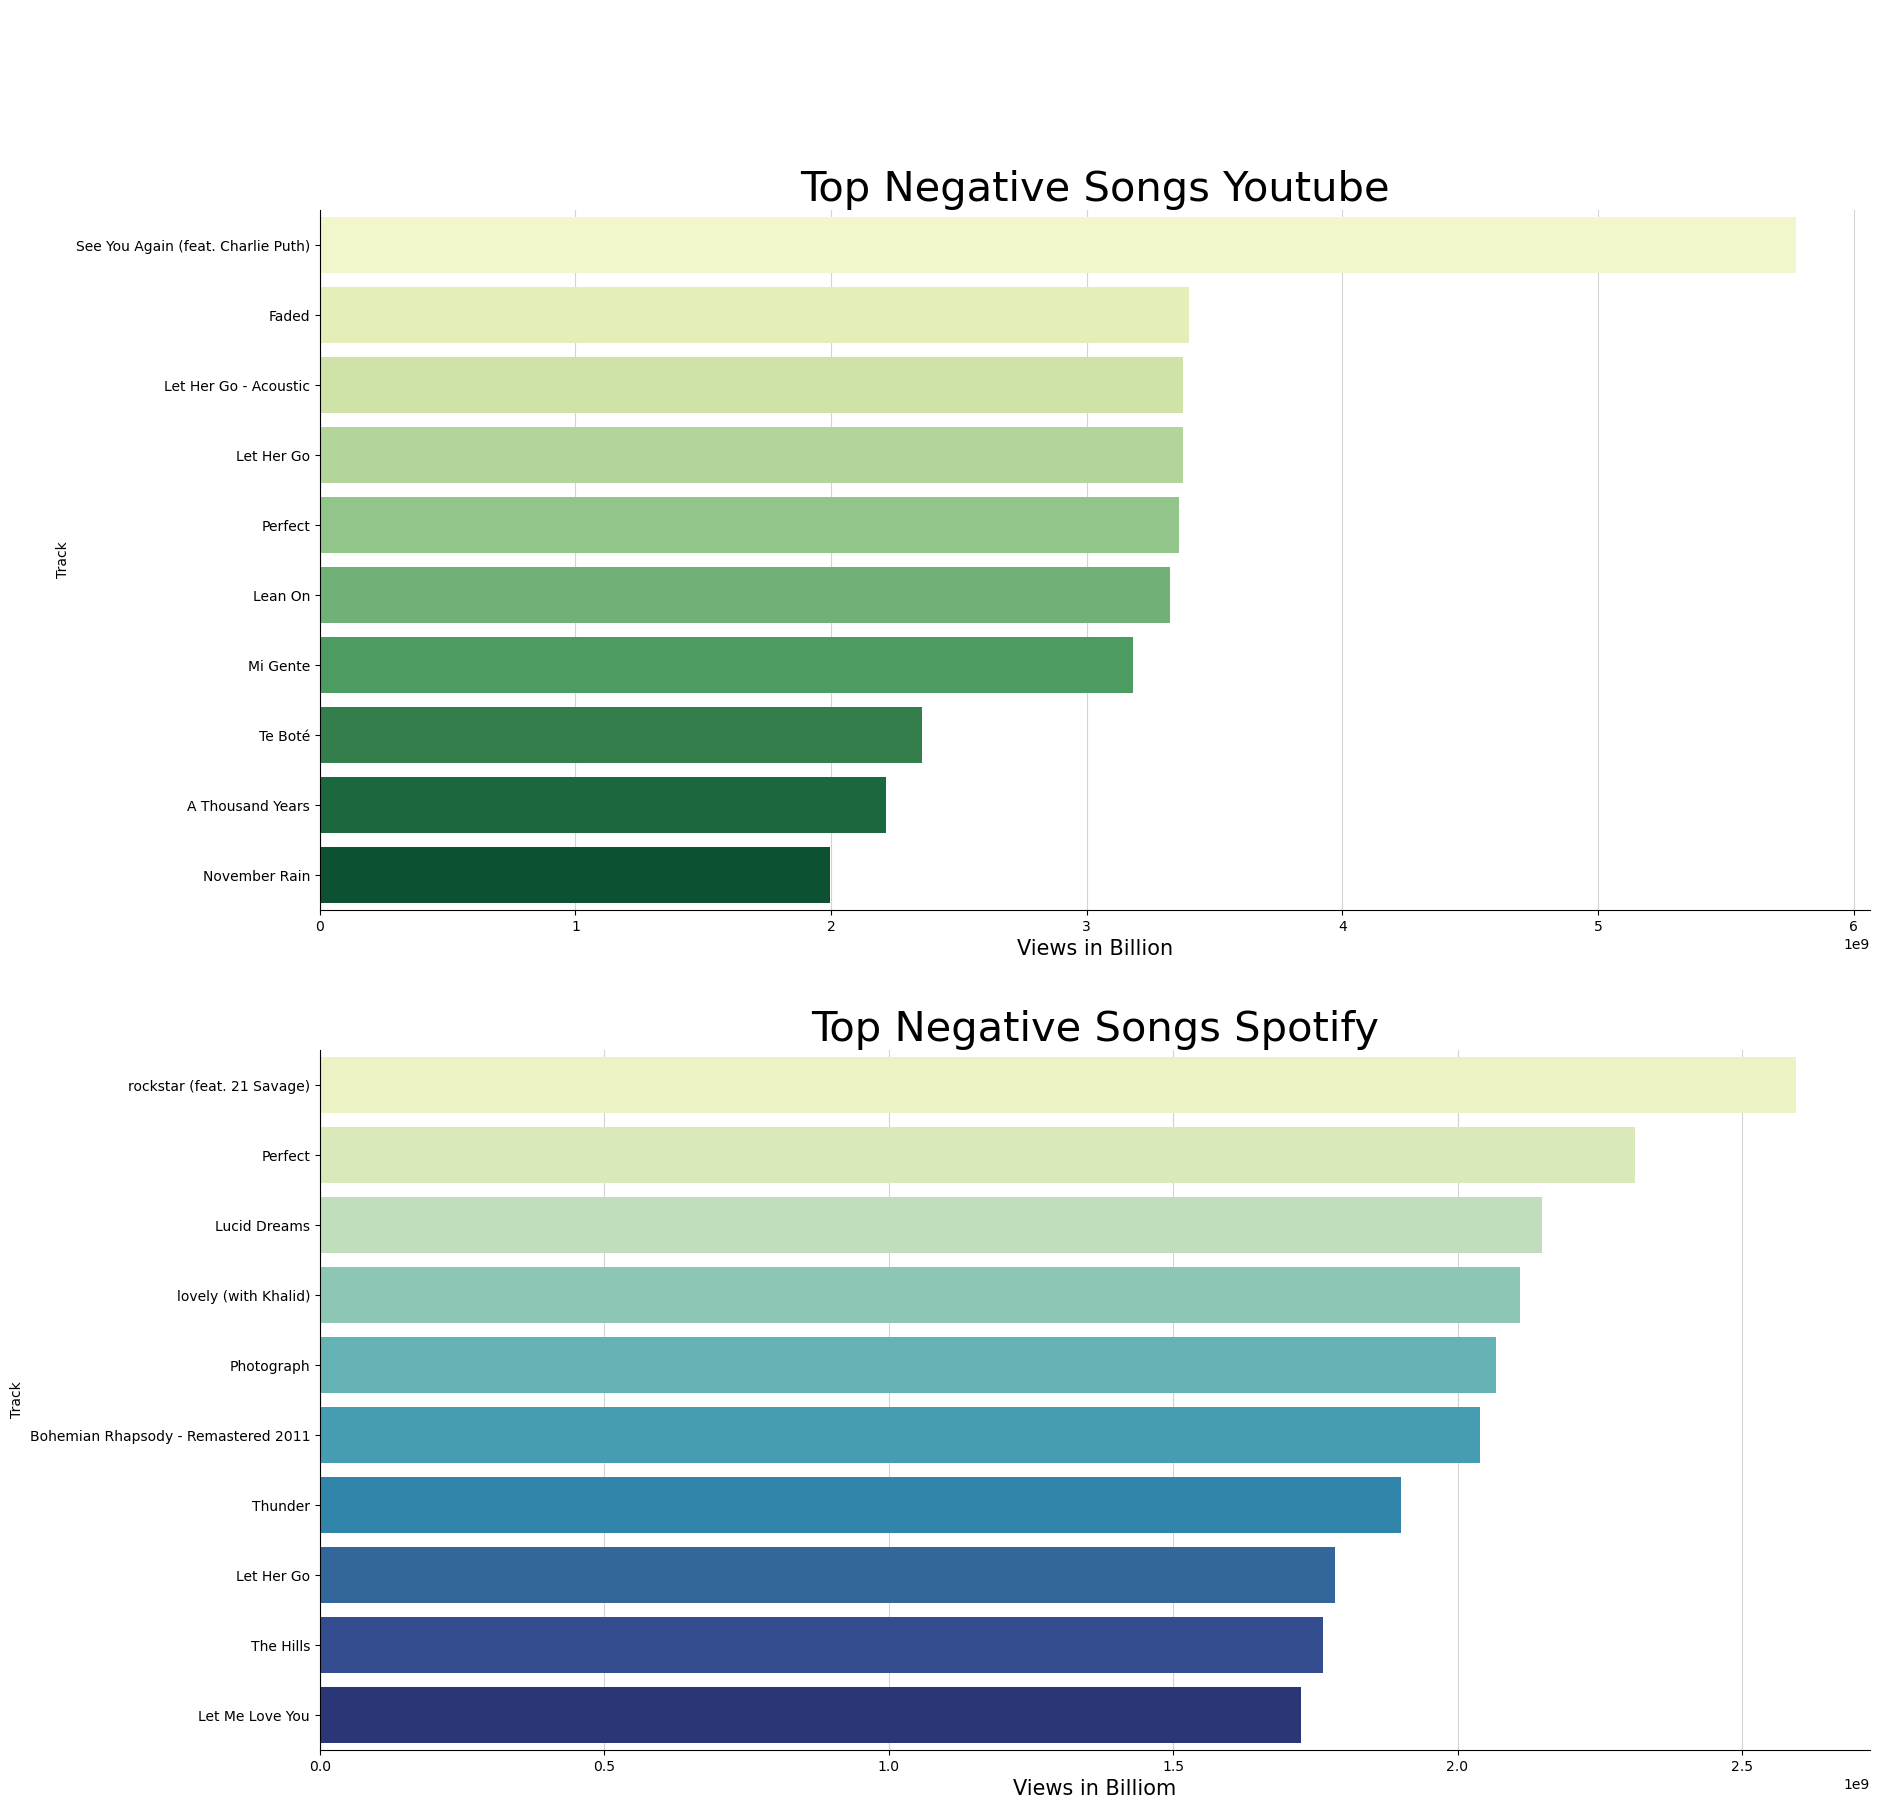

In [245]:
filtered_songs1 = df[df['Valence'] < 0.3]
sorted_songs1 = filtered_songs1.sort_values(by='Youtube_Views', ascending=False)
top_songs1 = sorted_songs1.head(10)

filtered_songs2 = df[df['Valence'] < 0.3]
sorted_songs2 = filtered_songs2.sort_values(by='Spotify_stream_num', ascending=False)
top_songs2 = sorted_songs2.head(10)
#double_barplot(top1,x_column1,y_column1,palette1,title1,xlabel1,top2,x_column2,y_column2,palette2,title2,xlabel2,main_title)

double_barplot(top_songs1,"Youtube_Views","Track","YlGn","Top Negative Songs Youtube","Views in Billion",top_songs2,"Spotify_stream_num","Track","YlGnBu","Top Negative Songs Spotify","Views in Billiom"," ")

ყველაზე პოპულარულ ბედნიერ სიმღერებში შედის: Shape of you, despacito, uptown funk. ყველასე სევდიანებში : See you again, faded.
ასევე ქვინის ბოჰემური რაფსოდიაც, რომელიც სავარაუდოდ ფრედი მერკურიზე გადაღებულმა ფილმმა გახადა პოპულარული.
ასევე საინტერესო ფაქტია ის რომ იუთბის მაგალითზე მხიარულ სიმღერები ნახვებით უსწრებს სევდიან სიმღერებს. მაშინ როცა იუთუბის ყველაზე პოპულარულ სიღერას 8 მილიარდზე მეტი ნახვა აქვს, სევდიან სიმღერას მაქსიუმუმ 6 მილიარდი ვიუ აქვს იუთუბზე. ასევე ტოპ 10დან დანარჩენ სიმღერებსაც უფრო მეტი ნახვები მხიარულებს აქვთ. სპოტიფაიზეც, ტოპ მხიარული სიღერა უსწრებს ტოპ სევდიანს, მაგრამ იუთუბისგან განსხვავებით,ტოპ 3ის მერე სევდიანები უსწრებენ.

ასევე დავაკვირდი, რომ კლასიკურ მუსიკას მაღალი Instrumentalness და დაბალი Acousticness აქვთ, ვცდი ყველაზე პოპულარული კლასიკური ნაწარმოებების ამოღებას.

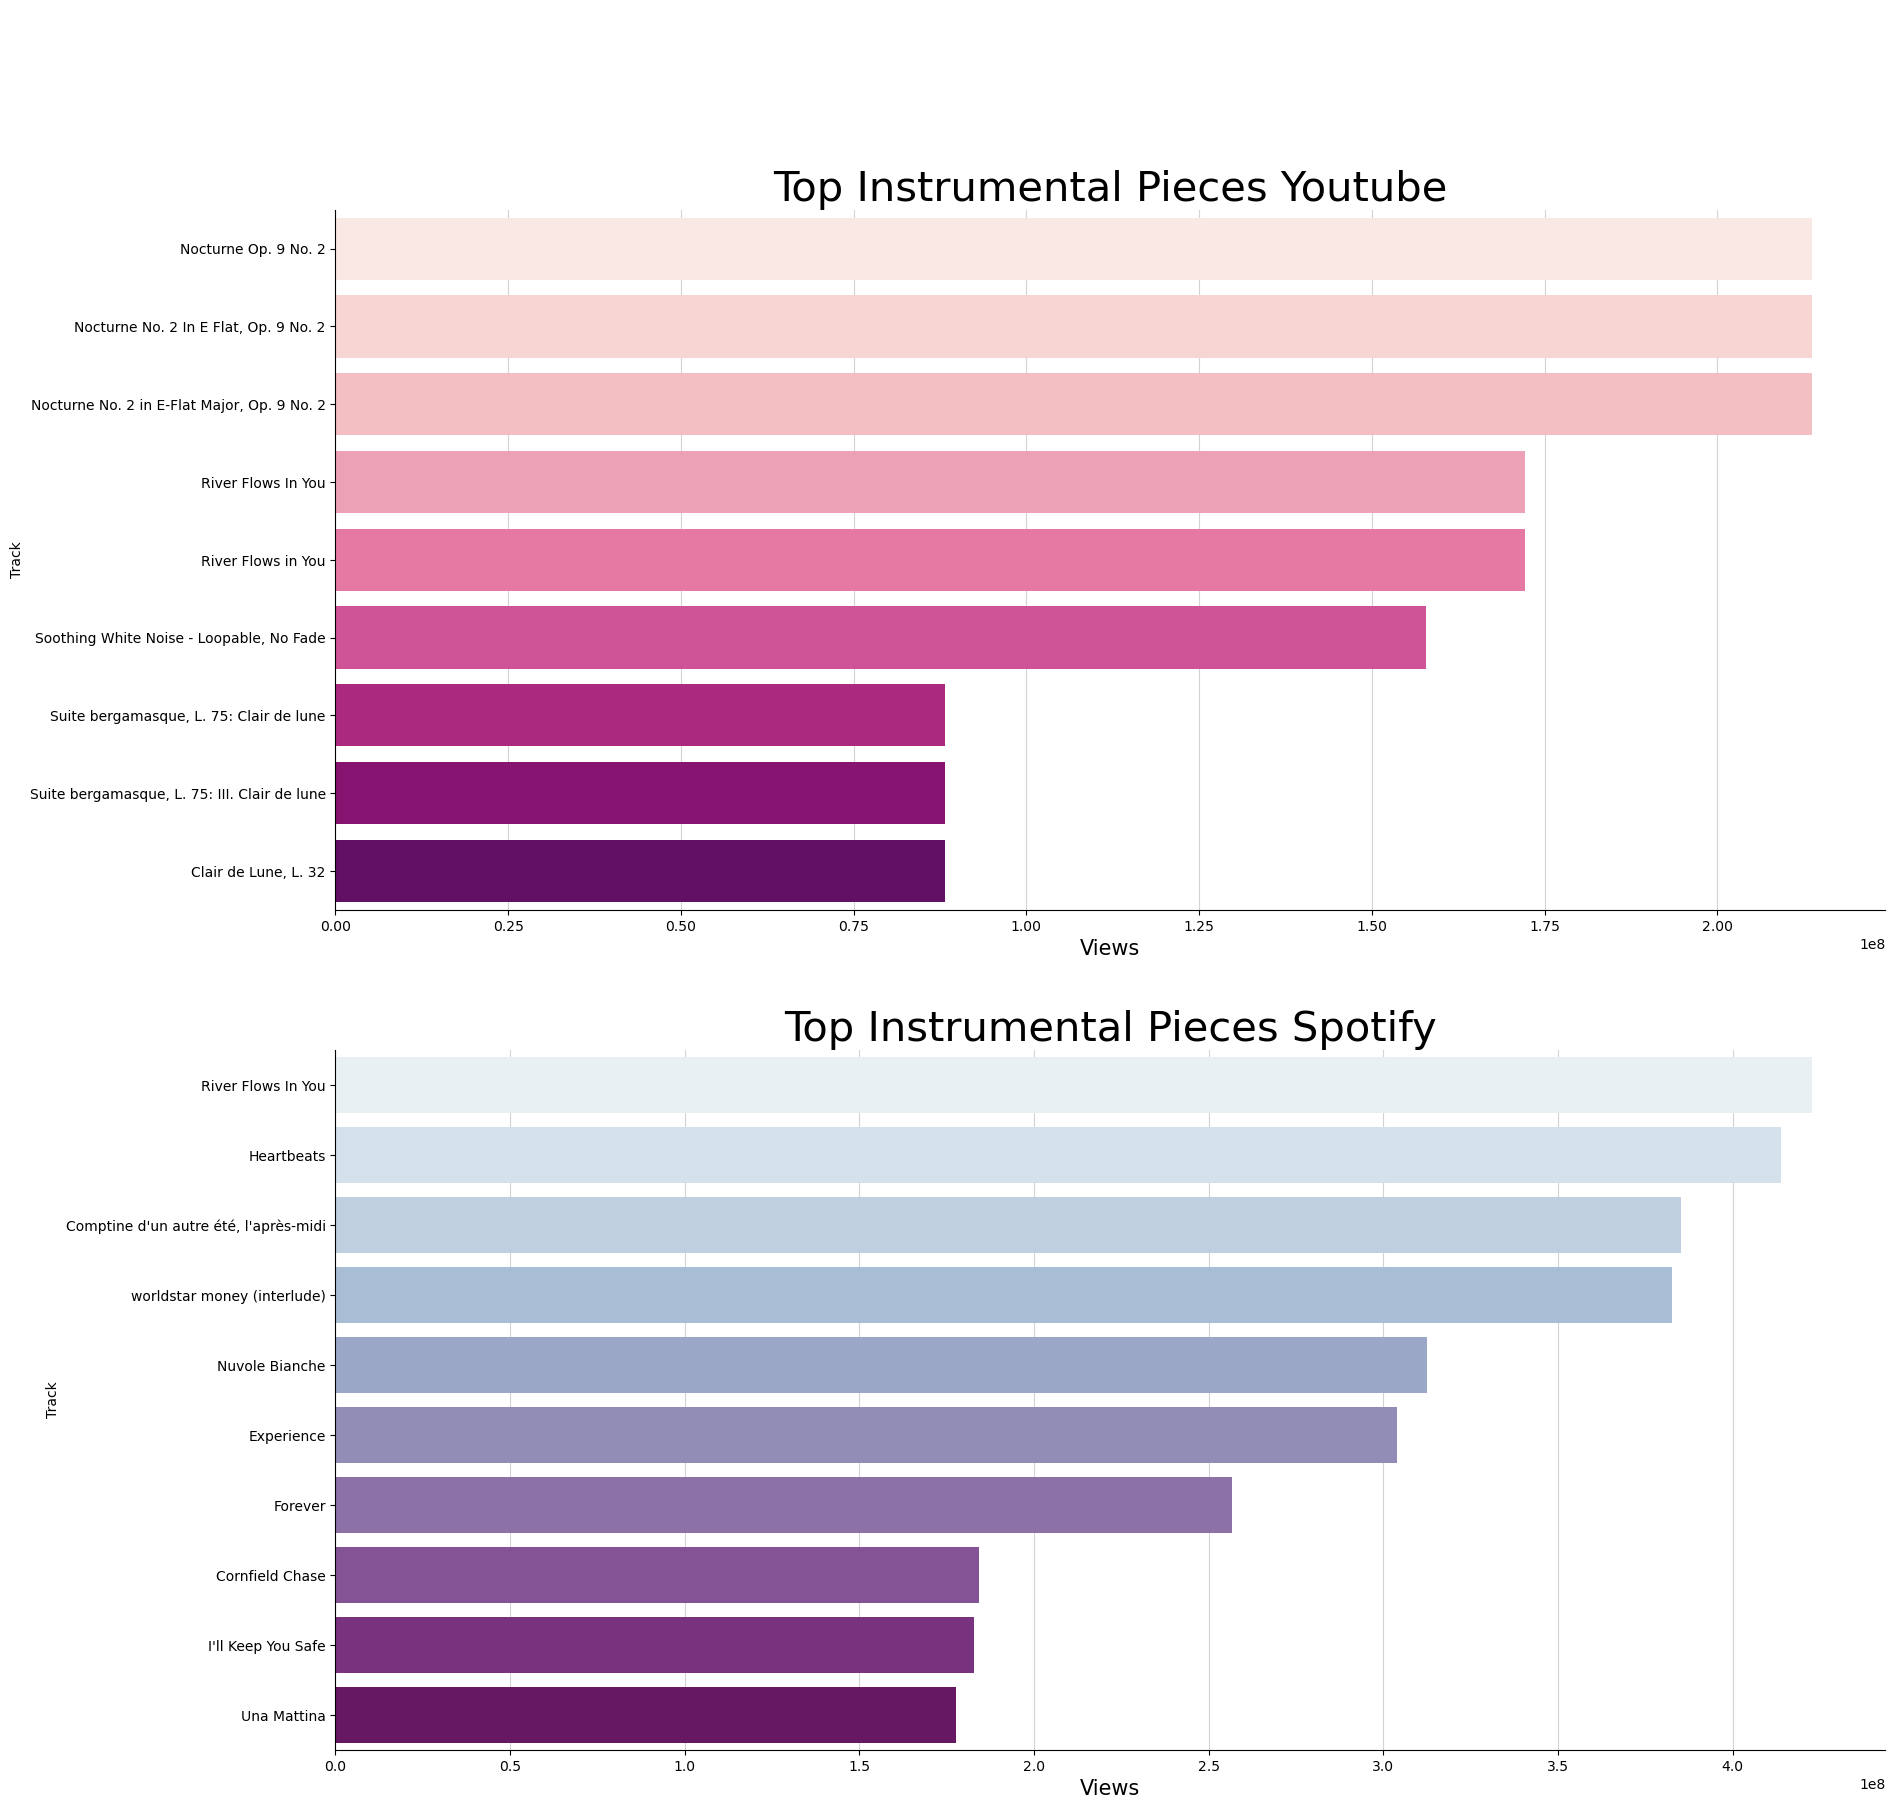

In [246]:
filtered_songs1 = df[(df['Acousticness'] > 0.9) & (df['Instrumentalness'] > 0.7) ]
sorted_songs1 = filtered_songs1.sort_values(by='Youtube_Views', ascending=False)
top_songs1 = sorted_songs1.head(10)

filtered_songs2 = df[(df['Acousticness'] > 0.9) & (df['Instrumentalness'] > 0.7) ]
sorted_songs2 = filtered_songs2.sort_values(by='Spotify_stream_num', ascending=False)
top_songs2 = sorted_songs2.head(10)

double_barplot(top_songs1,"Youtube_Views","Track","RdPu","Top Instrumental Pieces Youtube","Views",top_songs2,"Spotify_stream_num","Track","BuPu","Top Instrumental Pieces Spotify","Views"," ")

იუთუბზე კლასიკური ნარაწმოებებია პოპულარული, სპოტიფაიზე თანამედროვე კომპოზიტორები როგორებიცაა yiruma, yann tieresen, hans zimmer და სხვები. სავარაუდოდ, მათი პოპულარობაც ფილმებითაა განპირობებული. ასევე, გრაფიკებიდან ჩანს რომ ინტრუმენტალური მუსიკის პოპულარობა საკმაოდ აღემატება სპოტიფაიზე ვიდრე იუთუბზე

რომ შევაჯამოთ, თავდაპირველად დატა უბრალოდ გამოვიკვლიე, შემდეგ შეძლებისდაგვარად გავსუფთავე და ამის შემდეგ ავაგე დიაგრამები, რომლებმაც საშუალება მომცეს დამენახა სტატისტიკები. ამის შემდეგი ნაბიჯი სავარაუდოდ იქნება რაიმე მოდელის შემუშავება რომელიც ინფორმაციას იწინასწარმეტყველებს. მაგალითად, ალბათ შესაძლებელია მუსიკალური მახასიათებლების მიხედვით ["Acousticness":"Tempo"] გამოვიცნოთ ნაწარმოების ჟანრი. ასევე, წესით შესაძლებელი უნდა იყოს ნახვების წინასწარმეტყველებაც სხვა მახასიათებლების მიხედვით, რაც თავიდან ვცადე მაგრამ სწორ გზას ვერ მივაგენი და შემდეგ უბრალოდ წავშალე None მნიშვნელობიანი როუები.
